# Data Cleansing

Date: 07/11/2019

Version: 2.0

Environment: Python 3.7.3 and Anaconda 4.3.0 (64-bit)

## Introduction to Data Cleansing

Data Cleansing is defined as the process of detecting and correcting (or removing) corrupt or inaccurate records from a record, set, table, or database. 
Data cleansing can also be referred to as data cleaning, data scrubbing, or data reconciliation. More precisely, the process of Data cleansing could be explained as a four stage process:

1. Define and identify errors in data such as incompleteness, incorrectness, inaccuracy or irrelevancy
2. Clean and rectify these errors by replacing, modifying, or deleting them
3. Document error instances and error type
4. Measure and verify to see whether the cleansing meets the user's specified tolerance limits in terms of cleanliness

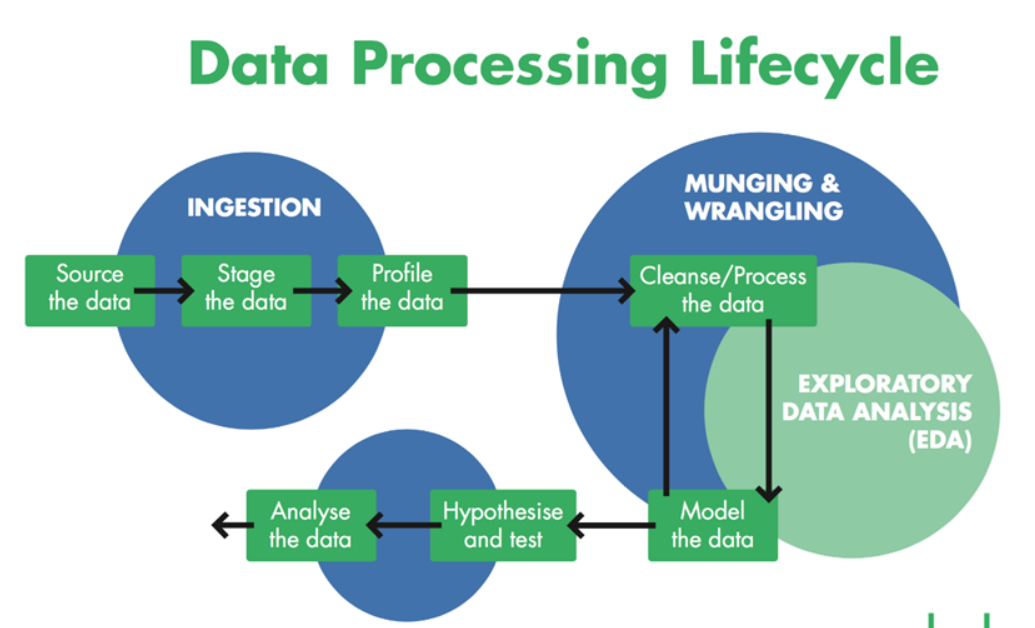

#### Libraries Used

- **numpy**:
numPy is a package in Python used for scientific computing to perform different operations. In this assignment numpy is used to solve the linear algebra equations for getting the menu price for each items.

- **pandas**: 
It is a third party library and mainly used for Data Science applications.In this assignment pandas library has used to read the provided csv files and perform the operations on it.

- **datetime**:
The datetime package is used to manipulate the date in the required formats. In this assignment datetime package is used to deal with the errors in the date column of dirty data.

- **networkx**:
networkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. In this assignment networkx package is used to draw the graph with the given nodes and edges.

- **sklearn**:
sklearn is the library that is used for many unsupervised and supervised learning algorithms. In this assignment we use sklearn.linear_model to draw our linear regression model to fit/train/test our model.

- **matplotlib**:
matplotlib is the plotting library used to plot different types of graphs. In this assignment we are using matplotlib for drawing boxplot and histograms.

- **re**:
It is a python inbuilt library used for matching special sequence of characters in any given text. It is more efficient than conventional pattern matching. In this assignment we use 're' library to know whether the latitude and longitude values are correct or not in the dirty_data file and change them accordingly.

- **sklearn.metrics**:
sklearn.metrics is used calculate the metrics of the drawn fit. In this assignment sklearn.metrics is used to calculate the r2-score for the drawn linear regression model.

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import time
import networkx
import re
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

## 2. Reading csv files for outlier,dirty,missing data

In [2]:
outlier_data = pd.read_csv("Group060_outlier_data.csv")
dirty_data=pd.read_csv("Group060_dirty_data.csv")
missing_data=pd.read_csv("Group060_missing_data.csv")
pd.set_option('mode.chained_assignment',None)

## 3. Fixing the menu items and their prices

Clearly from the given datasets Outliers Data doesnot have any anomalies,so we can use it to get the menu and their prices. So i have used the Outlier data and np.linalg.solve() function to calculate the price of each item in the menu and then the stored the menu in dictonary for future purpose.

In [3]:
menu={}
#loop for getting three types of menu
for food in ['Breakfast','Lunch','Dinner']:
    #getting the order items and order price from outlier data to calculate the menu
    items=list(outlier_data[outlier_data['order_type']==f'{food}']['order_items'])
    price=list(outlier_data[outlier_data['order_type']==f'{food}']['order_price'])
    l=[]
    l1=[]
    #converting the menu(in string format) to list of tuples
    for i in items:
        l.append(eval(i))
        l1.extend(eval(i))
    #getting the item names from the order list(list of tuples)
    l1=[x[0] for x in l1]
    #getting the items in the actual menu
    b_menu=sorted(list(set(l1)))
    food_list=list(zip(l,price))
    price=[]
    item=[]
    #loop for getting the orders which have all the menu items in it
    for i in food_list:
        if len(i[0])==len(b_menu):
            x=sorted(i[0],key=lambda x:x[0])
            item.append([x[j][1] for j in range(len(b_menu))])
            price.append(i[1])
    #solving the linear equations to get the price of the items using np.linalg.solve()
    cost=np.linalg.solve(item[:len(b_menu)], price[:len(b_menu)])
    y={}
    #storing them in Dictonary
    for i in range(len(b_menu)):
        y[b_menu[i]]=round(cost[i],2)
    menu[f'{food}']=y

In [4]:
print(menu)

{'Breakfast': {'Cereal': 21.0, 'Coffee': 7.5, 'Eggs': 22.0, 'Pancake': 24.25}, 'Lunch': {'Burger': 31.0, 'Chicken': 32.0, 'Fries': 12.0, 'Salad': 17.2, 'Steak': 45.0}, 'Dinner': {'Fish&Chips': 35.0, 'Pasta': 27.5, 'Salmon': 41.0, 'Shrimp': 54.0}}


In [5]:
'''We found out that there is a relation between order id(first four letters) and branch code so we made three sets for three branchs using 
the outlier data'''
BK=set(outlier_data[outlier_data['branch_code']=='BK']["order_id"].apply(lambda x: x[:4]))
TP=set(outlier_data[outlier_data['branch_code']=='TP']["order_id"].apply(lambda x: x[:4]))
NS=set(outlier_data[outlier_data['branch_code']=='NS']["order_id"].apply(lambda x: x[:4]))

## 4. Reading branches.csv file 

In [6]:
#Reading branches.csv file and store the latitude and longitude for each branch in a dictionary format
branch_data = pd.read_csv('branches.csv')
'''
Creating an empty dictionary and iterating through all the rows of branches.csv file and storing each branch name as key
and its latitude and longitude as values into a dictionary
'''
branch_dictionary = {}
for index,row in branch_data.iterrows():
    branch_dictionary.setdefault(row['branch_code'],[])
    branch_dictionary[row['branch_code']].append(row['branch_lat'])
    branch_dictionary[row['branch_code']].append(row['branch_lon'])

In [7]:
branch_dictionary

{'NS': [-37.7738026, 144.98364660000001],
 'TP': [-37.8618349, 144.90571599999998],
 'BK': [-37.8158343, 145.04645]}

## 5. Reading nodes.csv file

In [8]:
#Reading nodes.csv file and store the latitude and longitude for each node in a dictionary format
node_data = pd.read_csv('nodes.csv')
'''
Creating an empty dictionary and iterating through all the rows of nodes.csv file and storing each node as key and its latitude 
and longitude as values into a dictionary
'''
node_dictionary = {}
for index,row in node_data.iterrows():
    node_dictionary.setdefault(row['node'],[])
    node_dictionary[row['node']].append(row['lat'])
    node_dictionary[row['node']].append(row['lon'])

In [9]:
node_dictionary

{711327755.0: [-37.807675, 144.9558726],
 711327756.0: [-37.807094299999996, 144.9559785],
 711327759.0: [-37.807300899999994, 144.95781719999997],
 711327760.0: [-37.8078848, 144.9577193],
 777781264.0: [-37.80522070000001, 144.95217319999998],
 711327758.0: [-37.806249799999996, 144.9580023],
 164102232.0: [-37.8203223, 144.96753080000002],
 26476632.0: [-37.8227347, 144.9311156],
 26476637.0: [-37.826291299999994, 144.930619],
 26476642.0: [-37.826280100000005, 144.93074109999998],
 356125087.0: [-37.8165761, 144.98014730000003],
 26476659.0: [-37.8240968, 144.9307186],
 123338879.0: [-37.7996112, 144.92731809999998],
 560988348.0: [-37.8213426, 144.9463561],
 560988354.0: [-37.8210743, 144.94727269999998],
 560988353.0: [-37.821546999999995, 144.9450864],
 4733403342.0: [-37.8245657, 144.9627724],
 4733403343.0: [-37.824402, 144.9630551],
 367132897.0: [-37.8092779, 144.9738332],
 579993929.0: [-37.8044679, 144.93885880000002],
 579993932.0: [-37.8043312, 144.9386845],
 767820114.0

## 6. Reading edges.csv file

In [10]:
'''
Read edges.csv file and store the starting node which is represented as u_node , ending node which is represented as v_node,
diatnce between two nodes which is represented in meters as distance(m) into different lists
'''
edges_data = pd.read_csv('edges.csv')
u_node = []
v_node = []
edge_distance = []
for index,row in edges_data.iterrows():
    u_node.append(row['u'])
    v_node.append(row['v'])
    edge_distance.append(row['distance(m)'])

## 7. Methods

### 7.1 Method for calculating the shortest distance

In [11]:
'''
Finding the shortest distance between two nodes, with the help of graph drawn using networkx(a python package) by doing the
following steps,
(i)   Create an undirected graph using networkx.Graph().to_undirected() function
(ii)  Add all the edges to the graph, from the obtained above lists
(iii) Find the shortest path between the two nodes using dijkstra_path_length function. Here dijkstra's algorithm finds the 
shortest path depending upon the weights of the edges. The edges are added only if the edge is present between the nodes.

The obtained path is in meters. As the shortest path is supposed to be in kilometers we divided it with 1000 as,
1km = 1000m => 1/1000km = 1m
'''
def shortest_distance_calculation(b_node,c_node):
    graphs = networkx.Graph().to_undirected()
    for value in range(0,len(u_node)):
        graphs.add_edge(u_node[value],v_node[value],weight = edge_distance[value])
    return (networkx.dijkstra_path_length(graphs, b_node, c_node)/1000)

### 7.2 Method for getting the time of the day depending on the time

In [12]:
'''this is the function to categorise the records into three categories based on the time.'''
def time_cat(x):
    #returns 0 if the time is in between 8:00:00 to 12:00:00
    if (x>'07:59:59' and x<'12:00:01'):
        return 0
    #returns 1 if the time is in between 12:00:00 to 16:00:00
    elif (x >'12:00:00' and x<'16:00:01'):
        return 1
    #returns 2 if the time is in between 16:00:00 to 20:00:00
    elif (x >'16:00:00' and x< '20:00:01'):
        return 2

### 7.3 Method for getting the branch_code

In [13]:
'''this function bascially checks the correctness of the branch code with respect to the order id and imputes
the correct value if the original value is wrong'''
def B_code(df):
    df['flag']=0
    #creating a new column with the first four letters of order id
    order_df=df["order_id"].apply(lambda x: pd.Series({'ord':x[:4]}))
    df= pd.concat([df,order_df],axis=1)
    #checking the branch code and imputing the correct values for all rows
    for index,row in df[df['flag']==0].iterrows():
        if df.loc[index,'ord'] in BK and df.loc[index,'branch_code'] !='BK':
            df.loc[index,'branch_code']='BK'
            df.loc[index,'flag']=1
        elif df.loc[index,'ord'] in NS and df.loc[index,'branch_code'] != 'NS':
            df.loc[index,'branch_code']='NS'
            df.loc[index,'flag']=1
        elif df.loc[index,'ord'] in TP and df.loc[index,'branch_code'] != 'TP':
            df.loc[index,'branch_code']='TP'
            df.loc[index,'flag']=1
    return df

### 7.4 Method for getting the weekday or weekend

In [14]:
#function to check the given date is weekday or weekend
def day_cat(weekday_number):
    if weekday_number == 1 or weekday_number == 2 or weekday_number == 3 or weekday_number == 4 or weekday_number == 5:
        return 0
    if weekday_number == 6 or weekday_number == 7:
        return 1

## 8. Linear Regression Models

### 8.1 Method for predicting the missing values on delivery_fee for missing_data using Linear Regression model

Inorder to find the missing values, we use imputation methods. The various imputation methods are,

1. Mean imputation
2. Regression imputation
3. Stochastic regression imputation
4. Hot-deck imputation
5. Last observation carrie forward

Here, in the below model we use Regression imputation method because the missing values that are being predicted that is the delivery fee is linearly dependent on three parametres.

The below method takes three parameters x,y,branch_name where,

x = Dataframe that do not consist of NaN values,
y = Dataframe that consists of NaN values,
branch_name is either 'TP' , 'NS' , 'BK'.

The branch_name is taken into the consideration because each branch has different delivery fee, independent of sharing the same menu. So, we will calculate each branch NaN values with each branch non-NaN values. 

In [15]:
def imputation(x,y,branch_name):
    '''
    In the missing_data_branch variable we will get the rows that consists of NaN values in the delivery fee for only of the
    branch depending upon the branch_code, which we passed as the branch_name parameter, which can be either 'TP' or 'NS' or 'BK',
    and will reset the index is 'True' as the index values changes when we retrieve some rows based on the condition. So, to 
    have consistency in the index values and to overcome the merging problem when we replace the NaN values with the predicted
    values in a dataframe.
    '''
    missing_data_branch = y[y.branch_code == branch_name]
    missing_data_branch = missing_data_branch.reset_index(drop=True)
    
    '''
    In the missing_data_branch_total variable we will get the rows of only one branch_code where the branch_Code is equal to
    the branch_name which we passed as the parameter to the function and will reset the index is 'True' as the index values changes when we retrieve some rows based on the condition. So, to 
    have consistency in the index values and to overcome the merging problem when we replace the NaN values with the predicted
    values in a dataframe. 
    '''
    missing_data_branch_total = x[x.branch_code == branch_name]
    missing_data_branch_total = missing_data_branch_total.reset_index(drop=True)
    
    '''
    New column namely original_delivery_fee is created, because the values which are given in the delivery_fee of missing data
    are the values which are obtained by changing the delivery_fee to some value based on the customerHasloyalty column, 
    So, inorder to get the good fit we are finding the original delivery fee values for each non-NaN rows, by multiplying the
    given delivery fee value to 2 , if the customerHasloyalty is equal to one.
    '''
    missing_data_branch_total['original_delivery_fee'] = missing_data_branch_total['delivery_fee']
    for index,row in missing_data_branch_total.iterrows():
        if row['customerHasloyalty?'] == 1:
            missing_data_branch_total.loc[index,'original_delivery_fee'] =  2 * row['original_delivery_fee'] 
            
    
    #Before drawing a fit for the column values in a dataframe, we are removing the columns which we don't want in the dataframe
    
    lm_fitting_missing_data_branch = missing_data_branch_total.drop(missing_data_branch_total.columns[[0,1,2,3,4,5,6,7,8,9,11]],axis=1)
    #Instating the linear regression
    missing_data_impute_branch = LinearRegression() 
    '''
    Fit the linear regression model using the estimators and predictors where estimators are,
    (i)  weekend or weekday(1 or 0) as continuous variable
    (ii) time of the day(morning 0, afternoon 1, dinner 2) as a continuous variable
    (iii)distance between branch and customer
    '''
    a1 = missing_data_impute_branch.fit(lm_fitting_missing_data_branch[[x for x in lm_fitting_missing_data_branch.columns if x != 'original_delivery_fee']],lm_fitting_missing_data_branch['original_delivery_fee'])
    '''
    calculating the score value which is equal to the r-score value for the given fit to know how good the fit.
    '''
    print("The R-score value for the branch " +branch_name+ " is: ")
    print(a1.score(lm_fitting_missing_data_branch[[x for x in lm_fitting_missing_data_branch.columns if x != 'original_delivery_fee']],lm_fitting_missing_data_branch['original_delivery_fee']))
    
    '''
    Predicting the NaN values of delivery fee for the given branch based on the estimators and the resultant is the delivery fee
    which we need. Inorder to obtain the result the linear regression model uses the linear regression fit drawn above.
    '''
    missing_delivery_fee_values_branch = missing_data_impute_branch.predict(missing_data_branch.drop(['delivery_fee','order_id','date','time','order_type','branch_code','order_items','order_price','customer_lat','customer_lon','customerHasloyalty?'],axis=1)) 
    
    #Equating the NaN values with the predicted values, so that NaN values are being replaced with the predicted values
    missing_data_branch['delivery_fee'][missing_data_branch['delivery_fee'].isnull()] = missing_delivery_fee_values_branch
    
    '''
    The values which we are predicted are based on the customerHasloyalty as 0, Now, as there are no errors in the customerHasloyalty
    column, replace the delivery fee with half of the predicted delivery fee if the customerHasloyalty as 1. So, that the correct
    delivery fee is obtained as the customer gets 50% discount if he has the loyalty.
    '''
    for index,row in missing_data_branch.iterrows():
        if row['customerHasloyalty?'] == 1:
            missing_data_branch.loc[index,'delivery_fee'] = row['delivery_fee'] / 2
            
    #return the dataframe of the particular branch where NaN values of delivery fee are replaced
    return missing_data_branch

### 8.2 Method for predicting the delivery fee values in the outlier data based on the Linear Regression model 

We do not use the dirty_data to generate the model for outlier_data because, we are initially trying to get the original delivery fee based on the values of customerHasloyalty. As we do not know whether the customerHasloyalty column has correct values or not, we do not use dirty_data as wrong values effects our fit which in turn effects our prediction.

We do not use outlier_data to generate the model for outlier_data because outlier_data consists of some outliers, even though they are the correct one's. So, drawing the fit to predict the values in the outlier_data with the data which consists of outliers is not accurate one.

The only correct data with which we can make the best fit for outlier_data is based on the missing_data. 

In missing data there are total of 150 rows which has NaN values in either of branch_code, distance_to_customer_KM or delivery_fee columns. Initially we will replace the rows of branch_code and distance_to_customer_KM wher NaN's are present. Now, there are the correct values as we will get the proper branch_code based on the order_id's and distance_to_customer with
branch and customer's latitude and longitude. After replacing these NaN's in the missing data, the number of NaN's remaining are only 50 and those values which we predict are not the correct values as they are predicted values based on the drawn fit.
So, we will use the remaining 450 rows to generate the model for outlier_data.

We use linear regression model to predict the values for delivery fee because delivery_fee is linearly dependent on three variables. They are,

1. Weekend or Weekday(1 or 0) as continuous variable
2. Time of the day(morning 0, afternoon 1, dinner 2) as a continuous variable
3. Distance between branch and customer

The below function consists of two parameters x, out_data. Here x is the dataframe from missing data belonging to the particular branch of either TP,NS,BK. out_data is the slice of the dataframe from the outlier_data that consists of rows that belong to only particular branch of either TP,NS,BK. The x, out_data refers to only one branch_code at a time.

In [16]:
def prediction_outlier_data(x, out_data):
    '''
    New column namely original_delivery_fee is created, because the values which are given in the delivery_fee of missing data
    are the values which are obtained by changing the delivery_fee to some value based on the customerHasloyalty column, 
    So, inorder to get the good fit we are finding the original delivery fee values for each non-NaN rows, by multiplying the
    given delivery fee value to 2 , if the customerHasloyalty is equal to one.
    '''
    x['original_delivery_fee'] = x['delivery_fee']
    for index,row in x.iterrows():
        if x.loc[index,'customerHasloyalty?'] == 1:
            x.loc[index,'original_delivery_fee'] =  2 * x.loc[index,'original_delivery_fee'] 
    
    #Before drawing a fit for the column values in a dataframe, we are removing the columns which we don't want in the dataframe
    lm_fitting_x1 = x.drop(x.columns[[0,1,2,3,4,5,6,7,8,9,11]],axis=1)
    #Instatiate the linear regression fit
    missing_data_impute_branch = LinearRegression() 
    #fit the linear regression model
    r_scoree = missing_data_impute_branch.fit(lm_fitting_x1[[x for x in lm_fitting_x1.columns if x != 'original_delivery_fee']],lm_fitting_x1['original_delivery_fee'])
    #calculating the score value to know how good the fit 
    print(r_scoree.score(lm_fitting_x1[[x for x in lm_fitting_x1.columns if x != 'original_delivery_fee']],lm_fitting_x1['original_delivery_fee']))
    '''
    Predicting the values of delivery fee for the given branch based on the estimators and the resultant is the delivery fee
    which we need. Inorder to obtain the result the linear regression model uses the linear regression fit drawn above.
    '''
    a1 = missing_data_impute_branch.predict(out_data.drop(['delivery_fee','order_id','date','time','order_type','branch_code','order_items','order_price','customer_lat','customer_lon','customerHasloyalty?'],axis=1)) 
    
    '''
    The values which we are predicted are based on the customerHasloyalty as 0, Now, as there are no errors in the customerHasloyalty
    column, replace the delivery fee with half of the predicted delivery fee if the customerHasloyalty as 1. So, that the correct
    delivery fee is obtained as the customer gets 50% discount if he has the loyalty.
    '''
    out_data['predicted_values'] = a1
    for index,row in out_data.iterrows():
        if out_data.loc[index,'customerHasloyalty?'] == 1:
            out_data.loc[index,'predicted_values'] =  out_data.loc[index,'predicted_values'] / 2
            
    

### 8.3 Method for predicting the delivery fee values in the dirty data based on the Linear Regression model 

Here, to predict the delivery fee values in dirty_data, we generate the model using missing data and outlier data. Before doing dirty data we first do missing data and outlier data. So, in the missing data we will have 450 rows which are correct one's and in outlier data we have complete correct data after detecting and removing outliers. Now, in order to have sufficient data points we will have combine these two data's and predict the delivery fee values in dirty data. 

Here, We use linear regression model to predict the values for delivery fee because delivery_fee is linearly dependent on three variables. They are,

1. Weekend or Weekday(1 or 0) as continuous variable
2. Time of the day(morning 0, afternoon 1, dinner 2) as a continuous variable
3. Distance between branch and customer

In the below function we use two parameters, x, out_data. Here x is the dataframe that is obtained after combining missing and outlier data of a particular branch that is either TP,NS,BK and out_data is the dataframe that contains of rows from the dirty_data where branch code is either TP,NS,BK. The x, out_data refers to only one branch_code at a time.

In [17]:
def prediction_dirty_data(x, out_data):
    '''
    New column namely original_delivery_fee is created, because the values which are given in the delivery_fee of missing data
    are the values which are obtained by changing the delivery_fee to some value based on the customerHasloyalty column, 
    So, inorder to get the good fit we are finding the original delivery fee values for each non-NaN rows, by multiplying the
    given delivery fee value to 2 , if the customerHasloyalty is equal to one.
    '''
    x['original_delivery_fee'] = x['delivery_fee']
    for index,row in x.iterrows():
        if row['customerHasloyalty?'] == 1:
            x.loc[index,'original_delivery_fee'] =  2 * row['original_delivery_fee'] 
            
    #Before drawing a fit for the column values in a dataframe, we are removing the columns which we don't want in the dataframe
    lm_fitting_x1 = x.drop(x.columns[[0,1,2,3,4,5,6,7,8,9,11]],axis=1)
    #Instatiate the linear regression model
    missing_data_impute_branch = LinearRegression() 
    #fit the linear regression model
    r_scoree = missing_data_impute_branch.fit(lm_fitting_x1[[x for x in lm_fitting_x1.columns if x != 'original_delivery_fee']],lm_fitting_x1['original_delivery_fee'])
    #calculate the r-score value
    print(r_scoree.score(lm_fitting_x1[[x for x in lm_fitting_x1.columns if x != 'original_delivery_fee']],lm_fitting_x1['original_delivery_fee']))
    
    '''
    Predicting the NaN values of delivery fee for the given branch based on the estimators and the resultant is the delivery fee
    which we need. Inorder to obtain the result the linear regression model uses the linear regression fit drawn above.
    '''
    a1 = missing_data_impute_branch.predict(out_data.drop(['delivery_fee','order_id','date','time','order_type','branch_code','order_items','order_price','customer_lat','customer_lon','customerHasloyalty?'],axis=1)) 
    out_data['predicted_values'] = a1
    
    # return the dataframe with the predicted values of a particular branch type
    return out_data

## 9. Missing Data

The missing data is usually of three types,

1.Missing at random
2.Missing completely at random
3.Missing not at random

- **MAR**:
It is the probability of missing data on a variable is related to some other measured variable (or variables) in the analysis model but not to the values of the variable itself.

- **MCAR**:
It is the probability of missing data on a variable is unrelated to other measured variables and is unrelated to the values of the variable itself.

- **MNAR**:
It is the probability of missing data on a variable is related to the values of the variable itself, even after controlling for other variables.

Among the three types of missing values which are present above, the values that are missing in our given data are missing at random for branch_code and distance_to_customer_KM because the missing values present in the columns are predicted using the values in other columns and the values that are missing in the delivery fee are missing completely at random because in the delivery fee the missing values of each branch can be predicted based on the delivery fee available for each branch.

From the given data, by the manual observation missing values are present only in the three columns. They are,

1. branch_code
2. distance_to_customer_KM
3. delivery_fee

Firstly, we will fix the missing values in the branch_code because in order to determine the missing values in distance_to_customer_KM column we need the latitude and longitude of branch_code and to fix the missing values in the delivery_fee we need the distance_to_customer_KM column. As the missing values in distance_to_customer_KM and delivery_fee are interlinked with branch_code and distance_to_customer_KM, we will first fix the missing values in branch_code, followed by distance_to_customer_KM and finally the delivery_fee

### 9.1 Calculate the total number of missing values in a dataframe

In [18]:
len(missing_data[missing_data.isna().any(axis=1)])

150

### 9.2 Finding the missing values in branch code

In [19]:
'''
calling B_code method to replace the missing values in branch code for missing_data 
'''
missing_data=B_code(missing_data)

In [20]:
missing_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,flag,ord
0,ORDX05422,2018-06-17,13:24:30,Lunch,BK,"[('Fries', 6), ('Burger', 6), ('Salad', 10), (...",610.00,-37.802166,144.964518,0,7.721,NaN,0,ORDX
1,ORDA03471,2018-10-30,17:58:18,Dinner,BK,"[('Salmon', 10), ('Shrimp', 8), ('Pasta', 7), ...",1139.50,-37.801220,144.963020,0,8.061,14.950290,0,ORDA
2,ORDZ06892,2018-06-01,12:54:05,Lunch,NS,"[('Steak', 3), ('Burger', 8)]",383.00,-37.820953,144.947581,0,9.811,15.355152,1,ORDZ
3,ORDJ06269,2018-01-23,08:40:33,Breakfast,TP,"[('Coffee', 3), ('Pancake', 4), ('Cereal', 2),...",249.50,-37.798917,144.935682,0,11.325,13.543142,0,ORDJ
4,ORDZ01417,2018-10-29,17:58:18,Dinner,NS,"[('Pasta', 4), ('Shrimp', 6)]",434.00,-37.808045,144.973359,0,7.111,12.972792,0,ORDZ
5,ORDJ03771,2018-02-26,09:51:32,Breakfast,TP,"[('Pancake', 1), ('Coffee', 1)]",31.75,-37.807228,144.996662,0,11.002,13.440500,0,ORDJ
6,ORDJ02618,2018-06-22,13:44:47,Lunch,TP,"[('Fries', 2), ('Salad', 6)]",127.20,-37.803468,144.962735,0,9.433,12.399563,0,ORDJ
7,ORDX05073,2018-10-11,17:17:44,Dinner,BK,"[('Shrimp', 9), ('Pasta', 6)]",651.00,-37.812061,144.953145,0,8.433,15.278085,0,ORDX
8,ORDB06001,2018-11-14,18:28:43,Dinner,TP,"[('Fish&Chips', 3), ('Shrimp', 7)]",483.00,-37.806521,144.944874,0,NaN,14.456006,1,ORDB
9,ORDA06900,2018-03-28,10:52:23,Breakfast,BK,"[('Pancake', 5), ('Coffee', 5), ('Eggs', 6), (...",311.75,-37.812888,144.964137,0,7.648,12.264037,0,ORDA


In [21]:
#dropping the columns flag,ord which are unnecessary
missing_data.drop(['flag','ord'],axis=1,inplace=True)

### 9.3 Calculate the total number of missing values in branch_code after fixing the missing values in branch_code

In [22]:
len(missing_data[missing_data['branch_code'].isnull()])

0

### 9.4 Calculate the total number of missing values in a dataframe after fixing the missing values in branch_code

In [23]:
len(missing_data[missing_data.isna().any(axis=1)])

100

### 9.5 Finding the missing values in distance_to_customer_KM

In [24]:
for index,row in missing_data[missing_data['distance_to_customer_KM'].isnull()].iterrows():
    if row['branch_code'] in branch_dictionary.keys():
        for value in node_dictionary.items():
            if branch_dictionary[row['branch_code']][0]==value[1][0] and branch_dictionary[row['branch_code']][1]==value[1][1]:
                b_node = value[0]
            #missing_data.loc[index,'customer_lat']=round(row['customer_lat'],7)
            #missing_data.loc[index,'customer_lon']=round(row['customer_lon'],7)
            if row['customer_lat']==value[1][0] and row['customer_lon']==value[1][1]:
                c_node = value[0]
    missing_data.loc[index,'distance_to_customer_KM']=shortest_distance_calculation(b_node,c_node)

In [25]:
missing_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX05422,2018-06-17,13:24:30,Lunch,BK,"[('Fries', 6), ('Burger', 6), ('Salad', 10), (...",610.00,-37.802166,144.964518,0,7.721,NaN
1,ORDA03471,2018-10-30,17:58:18,Dinner,BK,"[('Salmon', 10), ('Shrimp', 8), ('Pasta', 7), ...",1139.50,-37.801220,144.963020,0,8.061,14.950290
2,ORDZ06892,2018-06-01,12:54:05,Lunch,NS,"[('Steak', 3), ('Burger', 8)]",383.00,-37.820953,144.947581,0,9.811,15.355152
3,ORDJ06269,2018-01-23,08:40:33,Breakfast,TP,"[('Coffee', 3), ('Pancake', 4), ('Cereal', 2),...",249.50,-37.798917,144.935682,0,11.325,13.543142
4,ORDZ01417,2018-10-29,17:58:18,Dinner,NS,"[('Pasta', 4), ('Shrimp', 6)]",434.00,-37.808045,144.973359,0,7.111,12.972792
5,ORDJ03771,2018-02-26,09:51:32,Breakfast,TP,"[('Pancake', 1), ('Coffee', 1)]",31.75,-37.807228,144.996662,0,11.002,13.440500
6,ORDJ02618,2018-06-22,13:44:47,Lunch,TP,"[('Fries', 2), ('Salad', 6)]",127.20,-37.803468,144.962735,0,9.433,12.399563
7,ORDX05073,2018-10-11,17:17:44,Dinner,BK,"[('Shrimp', 9), ('Pasta', 6)]",651.00,-37.812061,144.953145,0,8.433,15.278085
8,ORDB06001,2018-11-14,18:28:43,Dinner,TP,"[('Fish&Chips', 3), ('Shrimp', 7)]",483.00,-37.806521,144.944874,0,10.082,14.456006
9,ORDA06900,2018-03-28,10:52:23,Breakfast,BK,"[('Pancake', 5), ('Coffee', 5), ('Eggs', 6), (...",311.75,-37.812888,144.964137,0,7.648,12.264037


### 9.6 Calculate the total number of missing values in distance_to_customer_KM after fixing the missing values in distance_to_customer_KM

In [26]:
len(missing_data[missing_data['distance_to_customer_KM'].isnull()])

0

### 9.7 Calculate the total number of missing values in a dataframe after fixing the missing values in distance_to_customer_KM

In [27]:
len(missing_data[missing_data.isna().any(axis=1)])

50

### 9.8 Adding the new column to the missing_data namely day_type based on whether it is a weekday or weekend

In [28]:
day_type=missing_data['date'].apply(lambda x: pd.Series({'day_type':day_cat(dt.strptime(x , '%Y-%m-%d').isoweekday())}))
missing_data=pd.concat([missing_data,day_type],axis=1)

### 9.9 Adding the new column to the missing_data namely time_type based on whether it is breakfast , lunch or dinner time

In [29]:
time_type=missing_data['time'].apply(lambda x: pd.Series({'time_type':time_cat(x)}))
missing_data=pd.concat([missing_data,time_type],axis=1)

In [30]:
'''
Inorder to find the missing values in delivery_fee, we will initially divide the total dataframe into two, the one without 
having the null values and the one with having null values.
'''
x=missing_data[missing_data['delivery_fee'].notnull()]
y=missing_data[missing_data['delivery_fee'].isnull()]

In [31]:
'''
The imputation method is called for each branch with three parameters the one without null values, the one with null values and
the other is the branch namely, which can be either of TP,NS and BK
'''
a1 = imputation(x,y,'TP')
a2 = imputation(x,y,'NS')
a3 = imputation(x,y,'BK')

The R-score value for the branch TP is: 
0.9514033653441685
The R-score value for the branch NS is: 
0.9584774649398722
The R-score value for the branch BK is: 
0.9776430701290921


In [32]:
'''
Finally we will concatenate all the rows where the  missing values are found for delivery fee for each branch in the above cell
and the rows where delivery_fee is not null, which gives you the total 500 rows dataframe with replacing all the missing values
'''
final_df = pd.concat([a1,a2,a3,x])

In [33]:
final_df

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type
0,ORDY00512,2018-07-11,14:15:12,Lunch,TP,"[('Fries', 1), ('Chicken', 7)]",236.00,-37.818170,144.995437,0,10.178,13.367798,0,1
1,ORDY06156,2018-08-15,15:26:11,Lunch,TP,"[('Steak', 9), ('Burger', 4), ('Fries', 2)]",553.00,-37.809257,144.985635,0,9.821,13.063531,0,1
2,ORDJ02438,2018-05-14,12:23:39,Lunch,TP,"[('Steak', 3), ('Fries', 6), ('Chicken', 3), (...",461.40,-37.802310,144.980351,0,10.311,13.481152,0,1
3,ORDB07409,2018-06-12,13:24:30,Lunch,TP,"[('Steak', 10), ('Salad', 3)]",501.60,-37.805405,144.943579,0,10.203,13.389105,0,1
4,ORDB07220,2018-05-30,12:54:05,Lunch,TP,"[('Salad', 10), ('Fries', 8), ('Steak', 2), ('...",575.00,-37.824357,144.952343,0,8.339,11.800440,0,1
5,ORDB07864,2018-12-02,19:09:17,Dinner,TP,"[('Fish&Chips', 3), ('Pasta', 9), ('Shrimp', 8)]",784.50,-37.815279,144.938679,0,10.295,15.771658,1,2
6,ORDB09126,2018-08-25,15:46:28,Lunch,TP,"[('Steak', 4), ('Fries', 7), ('Chicken', 9)]",552.00,-37.824554,144.946887,0,8.859,13.792181,1,1
7,ORDJ05129,2018-06-23,13:44:47,Lunch,TP,"[('Fries', 2), ('Burger', 3), ('Salad', 5), ('...",325.00,-37.803639,144.992266,0,10.949,15.573463,1,1
8,ORDY00223,2018-04-22,11:32:57,Breakfast,TP,"[('Coffee', 6), ('Eggs', 9), ('Pancake', 10), ...",653.50,-37.820354,144.969943,0,7.721,12.066686,1,0
9,ORDY01375,2018-05-15,12:23:39,Lunch,TP,"[('Steak', 10), ('Salad', 1)]",467.20,-37.808164,144.971111,0,9.183,12.519771,0,1


### 9.10 Calculate the total number of missing values in delivery_fee after fixing the missing values in delivery_fee

In [34]:
len(final_df[final_df['delivery_fee'].isnull()])

0

### 9.11 Calculating the none values in the dataframe after fixing missing values

In [35]:
len(final_df[final_df.isna().any(axis=1)])

0

In [36]:
#dropping all the extra columns that are added previously
final_df.drop(['day_type','time_type'],axis=1,inplace=True)

In [37]:
final_df

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY00512,2018-07-11,14:15:12,Lunch,TP,"[('Fries', 1), ('Chicken', 7)]",236.00,-37.818170,144.995437,0,10.178,13.367798
1,ORDY06156,2018-08-15,15:26:11,Lunch,TP,"[('Steak', 9), ('Burger', 4), ('Fries', 2)]",553.00,-37.809257,144.985635,0,9.821,13.063531
2,ORDJ02438,2018-05-14,12:23:39,Lunch,TP,"[('Steak', 3), ('Fries', 6), ('Chicken', 3), (...",461.40,-37.802310,144.980351,0,10.311,13.481152
3,ORDB07409,2018-06-12,13:24:30,Lunch,TP,"[('Steak', 10), ('Salad', 3)]",501.60,-37.805405,144.943579,0,10.203,13.389105
4,ORDB07220,2018-05-30,12:54:05,Lunch,TP,"[('Salad', 10), ('Fries', 8), ('Steak', 2), ('...",575.00,-37.824357,144.952343,0,8.339,11.800440
5,ORDB07864,2018-12-02,19:09:17,Dinner,TP,"[('Fish&Chips', 3), ('Pasta', 9), ('Shrimp', 8)]",784.50,-37.815279,144.938679,0,10.295,15.771658
6,ORDB09126,2018-08-25,15:46:28,Lunch,TP,"[('Steak', 4), ('Fries', 7), ('Chicken', 9)]",552.00,-37.824554,144.946887,0,8.859,13.792181
7,ORDJ05129,2018-06-23,13:44:47,Lunch,TP,"[('Fries', 2), ('Burger', 3), ('Salad', 5), ('...",325.00,-37.803639,144.992266,0,10.949,15.573463
8,ORDY00223,2018-04-22,11:32:57,Breakfast,TP,"[('Coffee', 6), ('Eggs', 9), ('Pancake', 10), ...",653.50,-37.820354,144.969943,0,7.721,12.066686
9,ORDY01375,2018-05-15,12:23:39,Lunch,TP,"[('Steak', 10), ('Salad', 1)]",467.20,-37.808164,144.971111,0,9.183,12.519771


### 9.12 Writing the missing data into a dataframe

In [38]:
'''
Writing the missing data into a csv file using to_csv method with the filename Group060_missing_data_solution.csv and index
as False. The index is set to false because when we write the data into a dataframe the index of the dataframe is added as one
column.
'''
final_df.to_csv('Group060_missing_data_solution.csv',index=False)

## 10. Outlier Data

An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.

There are two types of outliers namely univariate and multivariate outliers.

We will detect the outliers based on different methods namely,

Methods to determine outliers for univariate type,

(i)  The 3sigma edit rule
(ii) The Hampel identifier
(iii)Quartile based detection and boxplot

Methods to determine outliers for multivariate type,

(i) linear models
(ii)proximity-based models

Here, in order to identify the outliers we are using residuals concept. The residuals is the difference between the actual value that is truth value and the predicted value where the fit is done using missing_data. Why only the missing_data is being used for fitting the data is explained in the above predicted_outlier_method. After getting the residuals, the box plot is drawn for the residuals and the rows are removed based on the calculation of "Quartiles" , "IQR" , "lower bound" and "upper bound" values.

The residuals concept is used here to identify the outliers because it gives the clear difference between the actual values and the predicted values and the accurate outliers can be removed from the outlier_data.

### 10.1 Adding the new column to the outlier_data namely day_type based on whether it is a weekday or weekend

In [39]:
day_type=outlier_data['date'].apply(lambda x: pd.Series({'day_type':day_cat(dt.strptime(x , '%Y-%m-%d').isoweekday())}))
outlier_data=pd.concat([outlier_data,day_type],axis=1)

### 10.2 Adding the new column to the outlier_data namely time_type based on whether it is breakfast , lunch or dinner time

In [40]:
time_type=outlier_data['time'].apply(lambda x: pd.Series({'time_type':time_cat(x)}))
outlier_data=pd.concat([outlier_data,time_type],axis=1)

In [41]:
#displaying the outlier data
outlier_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type
0,ORDJ03801,2018-02-13,09:21:07,Breakfast,TP,"[('Pancake', 9), ('Coffee', 1), ('Eggs', 8)]",401.75,-37.811289,144.975445,0,8.926,10.939303,0,0
1,ORDI08000,2018-10-29,17:58:18,Dinner,NS,"[('Pasta', 2), ('Salmon', 10)]",465.00,-37.817888,144.962137,0,8.617,15.128024,0,2
2,ORDK10380,2018-12-13,19:29:34,Dinner,BK,"[('Fish&Chips', 2), ('Shrimp', 7)]",448.00,-37.817781,144.931778,0,10.607,17.771584,0,2
3,ORDY10624,2018-08-10,15:16:03,Lunch,TP,"[('Burger', 5), ('Salad', 7), ('Fries', 10)]",395.40,-37.817331,144.952295,0,10.179,13.437867,0,1
4,ORDC01526,2018-01-14,08:20:16,Breakfast,NS,"[('Pancake', 7), ('Cereal', 3), ('Coffee', 9)]",300.25,-37.807139,144.991677,1,8.416,7.404869,1,0
5,ORDJ05082,2018-08-01,14:55:46,Lunch,TP,"[('Salad', 1), ('Fries', 5), ('Burger', 6), ('...",327.20,-37.814754,144.965171,0,8.020,11.603543,0,1
6,ORDJ07264,2018-01-17,08:30:25,Breakfast,TP,"[('Cereal', 1), ('Pancake', 7), ('Eggs', 7)]",344.75,-37.808085,144.929215,1,11.503,7.038657,0,0
7,ORDA03400,2018-02-15,09:21:07,Breakfast,BK,"[('Eggs', 2), ('Cereal', 7), ('Coffee', 5), ('...",374.00,-37.811006,145.005156,0,3.677,8.506785,0,0
8,ORDC10053,2018-06-09,13:14:21,Lunch,NS,"[('Fries', 6), ('Salad', 7), ('Steak', 7), ('B...",790.40,-37.799838,144.988903,0,7.966,15.910396,1,1
9,ORDJ09956,2018-05-02,11:53:14,Breakfast,TP,"[('Eggs', 4), ('Coffee', 7), ('Cereal', 10), (...",447.50,-37.819565,145.014100,0,11.889,14.201792,0,0


In [42]:
'''
getting the rows that contain only one particular branch and storing it each in one dataframe
'''
outlier_data_TP = outlier_data[outlier_data.branch_code == 'TP']
outlier_data_NS = outlier_data[outlier_data.branch_code == 'NS']
outlier_data_BK = outlier_data[outlier_data.branch_code == 'BK']

In [43]:
'''
when we extract the rows based on branch type, the indexes changes, to have consistency over the indexes , the reset indexes 
is being done
'''
outlier_data_TP = outlier_data_TP.reset_index(drop=True)
outlier_data_NS = outlier_data_NS.reset_index(drop=True)
outlier_data_BK = outlier_data_BK.reset_index(drop=True)

In the below cells x is the dataframe that is obtained from missing_data which do not consist of any NaN values. We get 450 rows which are obtained by replacing the branch_code and distance_to_customer_KM columns. We use here the missing data values in order to  predict the delivery fee for each branch in the outlier data. The explanation why we are choosing only missing data is explained above the method "prediction_outlier_data".

### 10.3 Selecting the dataframes with branch_names and calling the prediction_outlier_method to get the predicted values of delivery fee for each branch

In [44]:
#selecting the rows that consist of branch_code TP
x11 = x[x.branch_code == 'TP']
print('The R-score value for TP is:')
'''
calling the prediction_outlier_method with x11 and the outlier data which consist of rows only with branch TP
'''
prediction_outlier_data(x11,outlier_data_TP)

The R-score value for TP is:
0.9514033653441685


In [45]:
#selecting the rows that consist of branch_code NS
x12 = x[x.branch_code == 'NS']
print('The R-score value for NS is:')
'''
calling the prediction_outlier_method with x11 and the outlier data which consist of rows only with branch TP
'''
prediction_outlier_data(x12,outlier_data_NS)

The R-score value for NS is:
0.9584774649398722


In [46]:
#selecting the rows that consist of branch_code BK
x13 = x[x.branch_code == 'BK']
print('The R-score value for BK is:')
'''
calling the prediction_outlier_method with x11 and the outlier data which consist of rows only with branch TP
'''
prediction_outlier_data(x13,outlier_data_BK)

The R-score value for BK is:
0.9776430701290921


### 10.4 Calculating the residuals 

In [47]:
#The residuals are the difference between the truth and the predicted values of the delivery_fee for branch TP
outlier_data_TP['residuals'] = outlier_data_TP['delivery_fee'] - outlier_data_TP['predicted_values']
outlier_data_TP

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type,predicted_values,residuals
0,ORDJ03801,2018-02-13,09:21:07,Breakfast,TP,"[('Pancake', 9), ('Coffee', 1), ('Eggs', 8)]",401.75,-37.811289,144.975445,0,8.926,10.939303,0,0,11.545142,-0.605839
1,ORDY10624,2018-08-10,15:16:03,Lunch,TP,"[('Burger', 5), ('Salad', 7), ('Fries', 10)]",395.40,-37.817331,144.952295,0,10.179,13.437867,0,1,13.368650,0.069217
2,ORDJ05082,2018-08-01,14:55:46,Lunch,TP,"[('Salad', 1), ('Fries', 5), ('Burger', 6), ('...",327.20,-37.814754,144.965171,0,8.020,11.603543,0,1,11.528560,0.074983
3,ORDJ07264,2018-01-17,08:30:25,Breakfast,TP,"[('Cereal', 1), ('Pancake', 7), ('Eggs', 7)]",344.75,-37.808085,144.929215,1,11.503,7.038657,0,0,6.870744,0.167913
4,ORDJ09956,2018-05-02,11:53:14,Breakfast,TP,"[('Eggs', 4), ('Coffee', 7), ('Cereal', 10), (...",447.50,-37.819565,145.014100,0,11.889,14.201792,0,0,14.070471,0.131321
5,ORDJ09199,2018-08-15,15:26:11,Lunch,TP,"[('Salad', 8), ('Chicken', 5), ('Burger', 1), ...",532.60,-37.809066,144.983856,0,9.663,13.030769,0,1,12.928869,0.101900
6,ORDY01749,2018-09-06,16:16:54,Dinner,TP,"[('Shrimp', 4), ('Salmon', 8), ('Fish&Chips', ...",924.00,-37.798490,144.977975,0,10.369,14.151653,0,2,14.286176,-0.134523
7,ORDJ10868,2018-04-05,11:02:32,Breakfast,TP,"[('Eggs', 4), ('Cereal', 1), ('Coffee', 4), ('...",163.25,-37.818296,144.964878,0,7.548,10.703171,0,0,10.370689,0.332482
8,ORDJ00560,2018-02-01,09:00:50,Breakfast,TP,"[('Eggs', 4), ('Coffee', 5), ('Pancake', 7)]",295.25,-37.820474,144.979116,0,8.821,11.003275,0,0,11.455652,-0.452377
9,ORDY07672,2018-11-12,18:28:43,Dinner,TP,"[('Pasta', 8), ('Shrimp', 6), ('Salmon', 1)]",585.00,-37.803732,144.979729,0,10.277,14.311594,0,2,14.207765,0.103829


In [48]:
#The residuals are the difference between the truth and the predicted values of the delivery_fee for branch NS
outlier_data_NS['residuals'] = outlier_data_NS['delivery_fee'] - outlier_data_NS['predicted_values']
outlier_data_NS

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type,predicted_values,residuals
0,ORDI08000,2018-10-29,17:58:18,Dinner,NS,"[('Pasta', 2), ('Salmon', 10)]",465.00,-37.817888,144.962137,0,8.617,15.128024,0,2,14.581121,0.546903
1,ORDC01526,2018-01-14,08:20:16,Breakfast,NS,"[('Pancake', 7), ('Cereal', 3), ('Coffee', 9)]",300.25,-37.807139,144.991677,1,8.416,7.404869,1,0,7.711524,-0.306655
2,ORDC10053,2018-06-09,13:14:21,Lunch,NS,"[('Fries', 6), ('Salad', 7), ('Steak', 7), ('B...",790.40,-37.799838,144.988903,0,7.966,15.910396,1,1,15.425365,0.485031
3,ORDC10419,2018-08-18,15:36:20,Lunch,NS,"[('Burger', 10), ('Steak', 9)]",715.00,-37.812195,144.970521,0,7.440,15.191353,1,1,14.891858,0.299495
4,ORDZ08553,2018-04-24,11:43:05,Breakfast,NS,"[('Eggs', 9), ('Cereal', 3), ('Pancake', 5), (...",457.25,-37.818844,144.953189,0,9.244,14.650291,0,0,14.299590,0.350701
5,ORDI00480,2018-02-10,09:21:07,Breakfast,NS,"[('Cereal', 8), ('Pancake', 6), ('Coffee', 5)]",351.00,-37.808831,144.966449,0,7.169,14.019954,1,0,14.158250,-0.138296
6,ORDC09943,2018-09-03,16:06:45,Dinner,NS,"[('Salmon', 10), ('Fish&Chips', 8), ('Pasta', ...",933.50,-37.817266,144.970726,0,8.790,14.855925,0,2,14.756590,0.099335
7,ORDI04607,2018-08-08,15:16:03,Lunch,NS,"[('Salad', 10), ('Steak', 8), ('Chicken', 5), ...",728.00,-37.806340,144.941248,0,9.396,14.434384,0,1,14.912499,-0.478115
8,ORDZ04103,2018-10-07,17:17:44,Dinner,NS,"[('Salmon', 5), ('Fish&Chips', 4), ('Pasta', 8...",943.00,-37.802098,144.965701,0,6.669,14.605337,1,2,14.568594,0.036744
9,ORDI03765,2018-04-17,11:22:49,Breakfast,NS,"[('Pancake', 5), ('Coffee', 4), ('Eggs', 9)]",349.25,-37.812374,144.962387,0,7.856,12.702070,0,0,12.891780,-0.189710


In [49]:
#The residuals are the difference between the truth and the predicted values of the delivery_fee for branch BK
outlier_data_BK['residuals'] = outlier_data_BK['delivery_fee'] - outlier_data_BK['predicted_values']
outlier_data_BK

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type,predicted_values,residuals
0,ORDK10380,2018-12-13,19:29:34,Dinner,BK,"[('Fish&Chips', 2), ('Shrimp', 7)]",448.00,-37.817781,144.931778,0,10.607,17.771584,0,2,17.653760,0.117825
1,ORDA03400,2018-02-15,09:21:07,Breakfast,BK,"[('Eggs', 2), ('Cereal', 7), ('Coffee', 5), ('...",374.00,-37.811006,145.005156,0,3.677,8.506785,0,0,8.251704,0.255082
2,ORDK05409,2018-10-14,17:27:53,Dinner,BK,"[('Pasta', 9), ('Fish&Chips', 7)]",492.50,-37.823916,144.983678,0,6.769,16.581711,1,2,15.989513,0.592198
3,ORDK04550,2018-12-22,19:49:51,Dinner,BK,"[('Pasta', 7), ('Fish&Chips', 2)]",262.50,-37.818150,144.947290,0,9.336,18.475686,1,2,18.775633,-0.299947
4,ORDX02493,2018-08-07,15:16:03,Lunch,BK,"[('Chicken', 3), ('Salad', 9), ('Fries', 7), (...",787.80,-37.802698,144.946841,0,8.981,14.370084,0,1,14.948709,-0.578625
5,ORDA06597,2018-07-28,14:55:46,Lunch,BK,"[('Chicken', 2), ('Salad', 4), ('Fries', 2), (...",443.80,-37.812641,144.959718,0,7.911,16.147517,1,1,16.288740,-0.141223
6,ORDA00767,2018-01-19,08:30:25,Breakfast,BK,"[('Coffee', 7), ('Pancake', 8), ('Eggs', 1)]",268.50,-37.822954,144.955030,0,8.750,13.036678,0,0,13.757737,-0.721059
7,ORDX04771,2018-04-03,11:02:32,Breakfast,BK,"[('Cereal', 5), ('Eggs', 5)]",215.00,-37.810429,144.984431,0,5.622,9.485944,0,0,10.362730,-0.876786
8,ORDA10121,2018-03-03,10:01:41,Breakfast,BK,"[('Eggs', 1), ('Cereal', 5), ('Pancake', 10), ...",392.00,-37.824047,144.990125,0,6.246,13.982908,1,0,13.541361,0.441547
9,ORDA00997,2018-08-01,14:55:46,Lunch,BK,"[('Fries', 1), ('Burger', 8), ('Chicken', 4), ...",560.00,-37.807594,144.947973,0,8.904,15.170176,0,1,14.865137,0.305039


### 10.5 Drawing the boxplot to detect the outliers

Drawing the boxplot using matplotlib and to represent the residuals of all the branches in one box, we are storing all its values in a list and passing it as a parameter to the function boxplot, to have clear difference between median, lower and upper bound we are setting the patch_artist to true, and drawing the color for each boxes using colour codes and labelling each boxplot with its particular branch code name using set_xticklabels

[Text(0, 0, 'TP'), Text(0, 0, 'NS'), Text(0, 0, 'BK')]

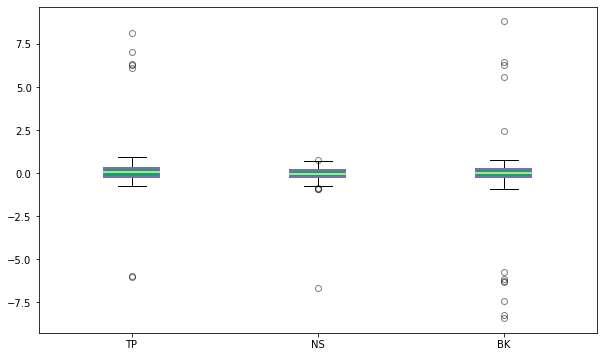

In [50]:
%matplotlib inline
TP_residuals = outlier_data_TP['residuals']
data_to_plot = [outlier_data_TP['residuals'], outlier_data_NS['residuals'], outlier_data_BK['residuals']]
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot,patch_artist=True)
for box in bp['boxes']:
    box.set( color='#7570b3', linewidth=2)
    box.set( facecolor = '#1b9e77' )
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax.set_xticklabels(['TP', 'NS', 'BK'])

### 10.6 Using the quantiles to get the lower and upper bounds to remove outliers for branch TP

In [51]:
'''
calculate 25th and 75th percentile for TP branch that is Q1 and Q3.
calculate IQR which is the difference between 75th percentile and 25th percentile.
calculate the lower bound and upper bound using the formulas where lower bound = Q1 - 1.5*IQR and upper bound = Q1 + 1.5*IQR
'''
outlier_data_TP_residual = outlier_data_TP['residuals']
Q1_TP = outlier_data_TP_residual.quantile(0.25)
Q3_TP = outlier_data_TP_residual.quantile(0.75)
IQR_TP = Q3_TP - Q1_TP
lower_bound_TP = Q1_TP - (1.5*IQR_TP)
upper_bound_TP = Q3_TP + (1.5*IQR_TP)

In [52]:
#remove the outliers for TP branch which are below the lower bound and above the upper bound
df_outlier_TP = outlier_data_TP.drop(outlier_data_TP.loc[outlier_data_TP['residuals'] > upper_bound_TP].index)
df_outlier_TP = df_outlier_TP.drop(outlier_data_TP.loc[outlier_data_TP['residuals'] < lower_bound_TP].index)
df_outlier_TP

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type,predicted_values,residuals
0,ORDJ03801,2018-02-13,09:21:07,Breakfast,TP,"[('Pancake', 9), ('Coffee', 1), ('Eggs', 8)]",401.75,-37.811289,144.975445,0,8.926,10.939303,0,0,11.545142,-0.605839
1,ORDY10624,2018-08-10,15:16:03,Lunch,TP,"[('Burger', 5), ('Salad', 7), ('Fries', 10)]",395.40,-37.817331,144.952295,0,10.179,13.437867,0,1,13.368650,0.069217
2,ORDJ05082,2018-08-01,14:55:46,Lunch,TP,"[('Salad', 1), ('Fries', 5), ('Burger', 6), ('...",327.20,-37.814754,144.965171,0,8.020,11.603543,0,1,11.528560,0.074983
3,ORDJ07264,2018-01-17,08:30:25,Breakfast,TP,"[('Cereal', 1), ('Pancake', 7), ('Eggs', 7)]",344.75,-37.808085,144.929215,1,11.503,7.038657,0,0,6.870744,0.167913
4,ORDJ09956,2018-05-02,11:53:14,Breakfast,TP,"[('Eggs', 4), ('Coffee', 7), ('Cereal', 10), (...",447.50,-37.819565,145.014100,0,11.889,14.201792,0,0,14.070471,0.131321
5,ORDJ09199,2018-08-15,15:26:11,Lunch,TP,"[('Salad', 8), ('Chicken', 5), ('Burger', 1), ...",532.60,-37.809066,144.983856,0,9.663,13.030769,0,1,12.928869,0.101900
6,ORDY01749,2018-09-06,16:16:54,Dinner,TP,"[('Shrimp', 4), ('Salmon', 8), ('Fish&Chips', ...",924.00,-37.798490,144.977975,0,10.369,14.151653,0,2,14.286176,-0.134523
7,ORDJ10868,2018-04-05,11:02:32,Breakfast,TP,"[('Eggs', 4), ('Cereal', 1), ('Coffee', 4), ('...",163.25,-37.818296,144.964878,0,7.548,10.703171,0,0,10.370689,0.332482
8,ORDJ00560,2018-02-01,09:00:50,Breakfast,TP,"[('Eggs', 4), ('Coffee', 5), ('Pancake', 7)]",295.25,-37.820474,144.979116,0,8.821,11.003275,0,0,11.455652,-0.452377
9,ORDY07672,2018-11-12,18:28:43,Dinner,TP,"[('Pasta', 8), ('Shrimp', 6), ('Salmon', 1)]",585.00,-37.803732,144.979729,0,10.277,14.311594,0,2,14.207765,0.103829


In [53]:
#after removing the outliers the reset index is being done to have consistency in the indexing
df_outlier_TP = df_outlier_TP.reset_index(drop=True)

### 10.7 Using the quantiles to get the lower and upper bounds to remove outliers for branch NS

In [54]:
'''
calculate 25th and 75th percentile for NS branch that is Q1 and Q3.
calculate IQR which is the difference between 75th percentile and 25th percentile.
calculate the lower bound and upper bound using the formulas where lower bound = Q1 - 1.5*IQR and upper bound = Q1 + 1.5*IQR
'''
outlier_data_NS_residual = outlier_data_NS['residuals']
Q1_NS = outlier_data_NS_residual.quantile(0.25)
Q3_NS = outlier_data_NS_residual.quantile(0.75)
IQR_NS = Q3_NS - Q1_NS
lower_bound_NS = Q1_NS - (1.5*IQR_NS)
upper_bound_NS = Q3_NS + (1.5*IQR_NS)

In [55]:
#remove the outliers for NS branch which are below the lower bound and above the upper bound
df_outlier_NS = outlier_data_NS.drop(outlier_data_NS.loc[outlier_data_NS['residuals'] > upper_bound_NS].index)
df_outlier_NS = df_outlier_NS.drop(outlier_data_NS.loc[outlier_data_NS['residuals'] < lower_bound_NS].index)
df_outlier_NS

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type,predicted_values,residuals
0,ORDI08000,2018-10-29,17:58:18,Dinner,NS,"[('Pasta', 2), ('Salmon', 10)]",465.00,-37.817888,144.962137,0,8.617,15.128024,0,2,14.581121,0.546903
1,ORDC01526,2018-01-14,08:20:16,Breakfast,NS,"[('Pancake', 7), ('Cereal', 3), ('Coffee', 9)]",300.25,-37.807139,144.991677,1,8.416,7.404869,1,0,7.711524,-0.306655
2,ORDC10053,2018-06-09,13:14:21,Lunch,NS,"[('Fries', 6), ('Salad', 7), ('Steak', 7), ('B...",790.40,-37.799838,144.988903,0,7.966,15.910396,1,1,15.425365,0.485031
3,ORDC10419,2018-08-18,15:36:20,Lunch,NS,"[('Burger', 10), ('Steak', 9)]",715.00,-37.812195,144.970521,0,7.440,15.191353,1,1,14.891858,0.299495
4,ORDZ08553,2018-04-24,11:43:05,Breakfast,NS,"[('Eggs', 9), ('Cereal', 3), ('Pancake', 5), (...",457.25,-37.818844,144.953189,0,9.244,14.650291,0,0,14.299590,0.350701
5,ORDI00480,2018-02-10,09:21:07,Breakfast,NS,"[('Cereal', 8), ('Pancake', 6), ('Coffee', 5)]",351.00,-37.808831,144.966449,0,7.169,14.019954,1,0,14.158250,-0.138296
6,ORDC09943,2018-09-03,16:06:45,Dinner,NS,"[('Salmon', 10), ('Fish&Chips', 8), ('Pasta', ...",933.50,-37.817266,144.970726,0,8.790,14.855925,0,2,14.756590,0.099335
7,ORDI04607,2018-08-08,15:16:03,Lunch,NS,"[('Salad', 10), ('Steak', 8), ('Chicken', 5), ...",728.00,-37.806340,144.941248,0,9.396,14.434384,0,1,14.912499,-0.478115
8,ORDZ04103,2018-10-07,17:17:44,Dinner,NS,"[('Salmon', 5), ('Fish&Chips', 4), ('Pasta', 8...",943.00,-37.802098,144.965701,0,6.669,14.605337,1,2,14.568594,0.036744
9,ORDI03765,2018-04-17,11:22:49,Breakfast,NS,"[('Pancake', 5), ('Coffee', 4), ('Eggs', 9)]",349.25,-37.812374,144.962387,0,7.856,12.702070,0,0,12.891780,-0.189710


In [56]:
#after removing the outliers the reset index is being done to have consistency in the indexing
df_outlier_NS = df_outlier_NS.reset_index(drop=True)

### 10.8 Using the quantiles to get the lower and upper bounds to remove outliers for branch BK

In [57]:
'''
calculate 25th and 75th percentile for BK branch that is Q1 and Q3.
calculate IQR which is the difference between 75th percentile and 25th percentile.
calculate the lower bound and upper bound using the formulas where lower bound = Q1 - 1.5*IQR and upper bound = Q1 + 1.5*IQR
'''
outlier_data_BK_residual = outlier_data_BK['residuals']
Q1_BK = outlier_data_BK_residual.quantile(0.25)
Q3_BK = outlier_data_BK_residual.quantile(0.75)
IQR_BK = Q3_NS - Q1_NS
lower_bound_BK = Q1_BK - (1.5*IQR_BK)
upper_bound_BK = Q3_BK + (1.5*IQR_BK)

In [58]:
#remove the outliers for BK branch which are below the lower bound and above the upper bound
df_outlier_BK = outlier_data_BK.drop(outlier_data_BK.loc[outlier_data_BK['residuals'] > upper_bound_BK].index)
df_outlier_BK = df_outlier_BK.drop(df_outlier_BK.loc[outlier_data_BK['residuals'] < lower_bound_BK].index)
df_outlier_BK

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type,predicted_values,residuals
0,ORDK10380,2018-12-13,19:29:34,Dinner,BK,"[('Fish&Chips', 2), ('Shrimp', 7)]",448.00,-37.817781,144.931778,0,10.607,17.771584,0,2,17.653760,0.117825
1,ORDA03400,2018-02-15,09:21:07,Breakfast,BK,"[('Eggs', 2), ('Cereal', 7), ('Coffee', 5), ('...",374.00,-37.811006,145.005156,0,3.677,8.506785,0,0,8.251704,0.255082
2,ORDK05409,2018-10-14,17:27:53,Dinner,BK,"[('Pasta', 9), ('Fish&Chips', 7)]",492.50,-37.823916,144.983678,0,6.769,16.581711,1,2,15.989513,0.592198
3,ORDK04550,2018-12-22,19:49:51,Dinner,BK,"[('Pasta', 7), ('Fish&Chips', 2)]",262.50,-37.818150,144.947290,0,9.336,18.475686,1,2,18.775633,-0.299947
4,ORDX02493,2018-08-07,15:16:03,Lunch,BK,"[('Chicken', 3), ('Salad', 9), ('Fries', 7), (...",787.80,-37.802698,144.946841,0,8.981,14.370084,0,1,14.948709,-0.578625
5,ORDA06597,2018-07-28,14:55:46,Lunch,BK,"[('Chicken', 2), ('Salad', 4), ('Fries', 2), (...",443.80,-37.812641,144.959718,0,7.911,16.147517,1,1,16.288740,-0.141223
6,ORDA00767,2018-01-19,08:30:25,Breakfast,BK,"[('Coffee', 7), ('Pancake', 8), ('Eggs', 1)]",268.50,-37.822954,144.955030,0,8.750,13.036678,0,0,13.757737,-0.721059
8,ORDA10121,2018-03-03,10:01:41,Breakfast,BK,"[('Eggs', 1), ('Cereal', 5), ('Pancake', 10), ...",392.00,-37.824047,144.990125,0,6.246,13.982908,1,0,13.541361,0.441547
9,ORDA00997,2018-08-01,14:55:46,Lunch,BK,"[('Fries', 1), ('Burger', 8), ('Chicken', 4), ...",560.00,-37.807594,144.947973,0,8.904,15.170176,0,1,14.865137,0.305039
10,ORDK02165,2018-02-18,09:31:16,Breakfast,BK,"[('Coffee', 4), ('Cereal', 2)]",72.00,-37.800140,145.014110,0,4.915,12.094259,1,0,12.096746,-0.002487


In [59]:
#after removing the outliers the reset index is being done to have consistency in the indexing
df_outlier_BK = df_outlier_BK.reset_index(drop=True)

In [60]:
#concatenate all the dataframes of each branch after removing the outliers
outlier_data_frame = pd.concat([df_outlier_TP, df_outlier_NS, df_outlier_BK])
outlier_data_frame

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type,predicted_values,residuals
0,ORDJ03801,2018-02-13,09:21:07,Breakfast,TP,"[('Pancake', 9), ('Coffee', 1), ('Eggs', 8)]",401.75,-37.811289,144.975445,0,8.926,10.939303,0,0,11.545142,-0.605839
1,ORDY10624,2018-08-10,15:16:03,Lunch,TP,"[('Burger', 5), ('Salad', 7), ('Fries', 10)]",395.40,-37.817331,144.952295,0,10.179,13.437867,0,1,13.368650,0.069217
2,ORDJ05082,2018-08-01,14:55:46,Lunch,TP,"[('Salad', 1), ('Fries', 5), ('Burger', 6), ('...",327.20,-37.814754,144.965171,0,8.020,11.603543,0,1,11.528560,0.074983
3,ORDJ07264,2018-01-17,08:30:25,Breakfast,TP,"[('Cereal', 1), ('Pancake', 7), ('Eggs', 7)]",344.75,-37.808085,144.929215,1,11.503,7.038657,0,0,6.870744,0.167913
4,ORDJ09956,2018-05-02,11:53:14,Breakfast,TP,"[('Eggs', 4), ('Coffee', 7), ('Cereal', 10), (...",447.50,-37.819565,145.014100,0,11.889,14.201792,0,0,14.070471,0.131321
5,ORDJ09199,2018-08-15,15:26:11,Lunch,TP,"[('Salad', 8), ('Chicken', 5), ('Burger', 1), ...",532.60,-37.809066,144.983856,0,9.663,13.030769,0,1,12.928869,0.101900
6,ORDY01749,2018-09-06,16:16:54,Dinner,TP,"[('Shrimp', 4), ('Salmon', 8), ('Fish&Chips', ...",924.00,-37.798490,144.977975,0,10.369,14.151653,0,2,14.286176,-0.134523
7,ORDJ10868,2018-04-05,11:02:32,Breakfast,TP,"[('Eggs', 4), ('Cereal', 1), ('Coffee', 4), ('...",163.25,-37.818296,144.964878,0,7.548,10.703171,0,0,10.370689,0.332482
8,ORDJ00560,2018-02-01,09:00:50,Breakfast,TP,"[('Eggs', 4), ('Coffee', 5), ('Pancake', 7)]",295.25,-37.820474,144.979116,0,8.821,11.003275,0,0,11.455652,-0.452377
9,ORDY07672,2018-11-12,18:28:43,Dinner,TP,"[('Pasta', 8), ('Shrimp', 6), ('Salmon', 1)]",585.00,-37.803732,144.979729,0,10.277,14.311594,0,2,14.207765,0.103829


In [61]:
#drop the extra columns which are added in the above steps
outlier_data_frame.drop(['day_type','time_type','predicted_values','residuals'],axis=1,inplace=True)

In [62]:
#displaying the dataframe
outlier_data_frame

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ03801,2018-02-13,09:21:07,Breakfast,TP,"[('Pancake', 9), ('Coffee', 1), ('Eggs', 8)]",401.75,-37.811289,144.975445,0,8.926,10.939303
1,ORDY10624,2018-08-10,15:16:03,Lunch,TP,"[('Burger', 5), ('Salad', 7), ('Fries', 10)]",395.40,-37.817331,144.952295,0,10.179,13.437867
2,ORDJ05082,2018-08-01,14:55:46,Lunch,TP,"[('Salad', 1), ('Fries', 5), ('Burger', 6), ('...",327.20,-37.814754,144.965171,0,8.020,11.603543
3,ORDJ07264,2018-01-17,08:30:25,Breakfast,TP,"[('Cereal', 1), ('Pancake', 7), ('Eggs', 7)]",344.75,-37.808085,144.929215,1,11.503,7.038657
4,ORDJ09956,2018-05-02,11:53:14,Breakfast,TP,"[('Eggs', 4), ('Coffee', 7), ('Cereal', 10), (...",447.50,-37.819565,145.014100,0,11.889,14.201792
5,ORDJ09199,2018-08-15,15:26:11,Lunch,TP,"[('Salad', 8), ('Chicken', 5), ('Burger', 1), ...",532.60,-37.809066,144.983856,0,9.663,13.030769
6,ORDY01749,2018-09-06,16:16:54,Dinner,TP,"[('Shrimp', 4), ('Salmon', 8), ('Fish&Chips', ...",924.00,-37.798490,144.977975,0,10.369,14.151653
7,ORDJ10868,2018-04-05,11:02:32,Breakfast,TP,"[('Eggs', 4), ('Cereal', 1), ('Coffee', 4), ('...",163.25,-37.818296,144.964878,0,7.548,10.703171
8,ORDJ00560,2018-02-01,09:00:50,Breakfast,TP,"[('Eggs', 4), ('Coffee', 5), ('Pancake', 7)]",295.25,-37.820474,144.979116,0,8.821,11.003275
9,ORDY07672,2018-11-12,18:28:43,Dinner,TP,"[('Pasta', 8), ('Shrimp', 6), ('Salmon', 1)]",585.00,-37.803732,144.979729,0,10.277,14.311594


In [63]:
print("The total number of outliers present in branch TP:", (len(outlier_data_TP.index) - len(df_outlier_TP.index)))
print("The total number of outliers present in branch NS:", (len(outlier_data_NS.index) - len(df_outlier_NS.index)))
print("The total number of outliers present in branch BK:", (len(outlier_data_BK.index) - len(df_outlier_BK.index)))

The total number of outliers present in branch TP: 7
The total number of outliers present in branch NS: 5
The total number of outliers present in branch BK: 14


In [64]:
print("The total number of outliers present in the given file are:", (len(outlier_data.index) - len(outlier_data_frame.index)))

The total number of outliers present in the given file are: 26


### 10.9 Writing the outlier data into a csv file

In [65]:
'''
Writing the outlier data into a csv file using to_csv method with the filename Group060_outlier_data_solution.csv and index
as False. The index is set to false because when we write the data into a dataframe the index of the dataframe is added as one
column.
'''
outlier_data_frame.to_csv('Group060_outlier_data_solution.csv',index=False)

## 11. Dirty data

In dirty data, the errors can be fixed only in branch_code, date , order_type, order_items, order_price, customer_lat, customer_lon, customerHasloyalty, distance_to_customer_KM. 

In the order_id column, by manual observation each order_id is observed as unique and we can't find and fix the errors in an order_id as we don't have any order-id's to compare and replace it. 

In date column , the date must follow a specific pattern like 'YYYY-MM-DD', we can find the errors in this column if any date do not follow this pattern.

In time column we can't find any errors because, the time at which that particular order_id is taken in a given day is only one value and cannot be corrected as we don't have anything to compare or replace it with. 

In order-type the error can be found based on the time, as each time follows one particular order type only like, 
(a) Breakfast (8am-12pm)
(b) Lunch (12:00:01-4pm)
(c) Dinner(4:00:01pm-8pm)

In branch_code column the errors can be found. If we observe the order-id's we can identify that each branch follows some pattern for the first four letters. So, all the possible pattern of first four letters for every branch is obtained by using outlier_data and corrected in the dirty_data.

In order to know the error in order-items and order-price, first we have to get the menu for breakfast, lunch and dinner with their specific prices. After finding these, we can find the errors in order-items and order-price, depending upon the menu we got. The menu is obtained by using the outlier_data as it the correct data and which do not consist of any errors and they are the actually occured values.

In customer_lat, customer_lon columns the errors can be found based on the given nodes.csv files where latitude and longitudes are present for the customer.

In the customerHasloyalty column the error can be found based on the predicted delivery fee to the actual/truth delivery_fee value.

In the distance_to_customer_KM column the errors can be found based on the calculation of distance using networkx package between branch and customer.

There are no errors in delivery_fee

So, overall the errors are found in 9 columns among 12 columns. Also we were told that every row has atmost 1 error so we implemented the flag concept. To do this we created a new column named flag and its value if 1 if the error is rectified else 0. This concept will reduce the number of iterations and increase the code efficiency.

### 11.1 Fixing the errors in branch_code column

In [66]:
dirty_data=B_code(dirty_data)

In [67]:
dirty_data['flag'].value_counts()

0    463
1     37
Name: flag, dtype: int64

In [68]:
pd.crosstab(dirty_data['branch_code'],dirty_data['ord'])

ord,ORDA,ORDB,ORDC,ORDI,ORDJ,ORDK,ORDX,ORDY,ORDZ
branch_code,,,,,,,,,
BK,40,0,0,0,0,56,68,0,0
NS,0,0,70,63,0,0,0,0,50
TP,0,48,0,0,44,0,0,61,0


### 11.2 Fixing the errors in order_type column based on the time

In [69]:
#creating a new column to categorise the time column to Breakfast(0) or Lunch(1) or Dinner(2)
order_time_cat=dirty_data['time'].apply(lambda x: pd.Series({'order_time_cat':time_cat(x)}))
dirty_data=pd.concat([dirty_data,order_time_cat],axis=1)

In [70]:
pd.crosstab(dirty_data['order_time_cat'],dirty_data['order_type'])

order_type,Breakfast,Dinner,Lunch
order_time_cat,,,
0,155,4,1
1,8,9,155
2,9,153,6


In [71]:
#correcting the order type based on the time
for index,row in dirty_data[dirty_data['flag']==0].iterrows():
    if dirty_data.loc[index,'order_time_cat'] == 0 and dirty_data.loc[index,'order_type']!='Breakfast':
        dirty_data.loc[index,'order_type']='Breakfast'
        dirty_data.loc[index,'flag']=1
    elif dirty_data.loc[index,'order_time_cat'] == 1 and dirty_data.loc[index,'order_type']!='Lunch':
        dirty_data.loc[index,'order_type']='Lunch'
        dirty_data.loc[index,'flag']=1
    elif dirty_data.loc[index,'order_time_cat'] == 2 and dirty_data.loc[index,'order_type']!='Dinner':
        dirty_data.loc[index,'order_type']='Dinner'
        dirty_data.loc[index,'flag']=1

In [72]:
pd.crosstab(dirty_data['order_time_cat'],dirty_data['order_type'])

order_type,Breakfast,Dinner,Lunch
order_time_cat,,,
0,160,0,0
1,0,0,172
2,0,168,0


In [73]:
dirty_data['flag'].value_counts()

0    426
1     74
Name: flag, dtype: int64

### 11.3 Fixing the errors in order_items and order_price columns

In [74]:
#ceating a new column to convert the order string to list of tuples
menu_df=dirty_data["order_items"].apply(lambda m: pd.Series({'ord_item':eval(m)}))
menu_df
dirty_data= pd.concat([dirty_data,menu_df],axis=1)

The next few lines of code is to check the order price errors and order item errors. Since we were told that there is at most one error in each row, there could be either a price error or item error but not both at a time. So we put the whole code in try except block. First we will try to check the order price using the menu which we created by using outlier data.If we get the KeyError which means the item is not there in the menu so we will try to calculate the price of the item and try to impute the correct item back in the menu.

In [75]:
for index,row in dirty_data[dirty_data['flag']==0].iterrows():
    try:
        cal_price=0
        for i in row['ord_item']:
            cal_price+=menu[row['order_type']][i[0]]*i[1]
        if round(cal_price,2)!=row['order_price']:
            dirty_data.loc[index,'order_price']=round(cal_price,2)
            dirty_data.loc[index,'flag']=1
    except KeyError:
        cal_p=0
        dirty_data.loc[index,'flag']=1
        for j in row['ord_item']:
            if j[0] in list(menu[row['order_type']].keys()):
                cal_p+=menu[row['order_type']][j[0]]*j[1]
            else:
                w_item = row['ord_item'].index(j)
        diff = round((row['order_price']-cal_p)/i[1],2)
        key_list=list(menu[row['order_type']].keys())
        val_list=list(menu[row['order_type']].values())
        dirty_data.loc[index,'ord_item'][w_item]=(key_list[val_list.index(diff)],i[1])
        dirty_data.loc[index,'order_items']=str(dirty_data.loc[index,'ord_item'])

In [76]:
dirty_data['flag'].value_counts()

0    352
1    148
Name: flag, dtype: int64

### 11.4 Fixing the errors in customer_lat and customer_lon columns

In [77]:
for index,row in dirty_data[dirty_data['flag']==0].iterrows():
   
    '''
    Checking whether distance between branch and customer entered in the csv file is correct. If not, replace the distance
    with the shortest calculated distance.
    '''
    if re.search(r'^(144.)[0-9]+',str(row['customer_lat'])):
        dirty_data.loc[index,'customer_lat'] = float(row['customer_lon'])
        dirty_data.loc[index,'customer_lon'] = float(row['customer_lat'])
        dirty_data.loc[index,'flag']=1
       
    if re.search(r'^(37.)[0-9]+', str(row['customer_lat'])):
        dirty_data.loc[index,'customer_lat'] = - dirty_data.loc[index,'customer_lat']
        dirty_data.loc[index,'flag']=1

In [78]:
dirty_data['flag'].value_counts()

0    311
1    189
Name: flag, dtype: int64

### 11.5 Fixing the errors in distance_to_customer_KM column

In [79]:
for index,row in dirty_data[dirty_data['flag']==0].iterrows():
    checking_shortest_distance = round(row['distance_to_customer_KM'],3)
    if row['branch_code'] in branch_dictionary.keys():
        for value in node_dictionary.items():
            if branch_dictionary[row['branch_code']][0]==value[1][0] and branch_dictionary[row['branch_code']][1]==value[1][1]:
                b_node = value[0]
            if row['customer_lat']==value[1][0] and row['customer_lon']==value[1][1]:
                c_node = value[0]
    actual_short_distance=shortest_distance_calculation(b_node,c_node)
    if checking_shortest_distance != actual_short_distance :
        dirty_data.loc[index,'distance_to_customer_KM'] = actual_short_distance
        dirty_data.loc[index,'flag']=1

In [80]:
dirty_data['flag'].value_counts()

0    274
1    226
Name: flag, dtype: int64

### 11.6 Fixing the errors in date column

In [81]:
for index,row in dirty_data[dirty_data['flag']==0].iterrows():
    try:
        date = dt.strptime(row['date'], '%Y-%d-%m')
        if date.day > 12:
            dirty_data.loc[index,'date'] = date.strftime('%Y-%m-%d')
            dirty_data.loc[index,'flag']=1
    except ValueError:
        pass  
    try:
        date = dt.strptime(row['date'], '%d-%m-%Y')
        if date:
            dirty_data.loc[index,'date'] = date.strftime('%Y-%m-%d')
            dirty_data.loc[index,'flag']=1
    except ValueError:
        pass

In [82]:
Errors = (dirty_data['flag'].values == 1).sum()
Errors

263

### 11.7 Adding the new column to the dirty_data namely day_type based on whether it is a weekday or weekend

In [83]:
day_type=dirty_data['date'].apply(lambda x: pd.Series({'day_type':day_cat(dt.strptime(x , '%Y-%m-%d').isoweekday())}))
dirty_data=pd.concat([dirty_data,day_type],axis=1)

### 11.8 Adding the new column to the dirty_data namely time_type based on whether it is a breakfast, lunch or dinner time

In [84]:
time_type=dirty_data['time'].apply(lambda x: pd.Series({'time_type':time_cat(x)}))
dirty_data=pd.concat([dirty_data,time_type],axis=1)

### 11.9 Finding errors in customerHasloyalty column and replacing it with the correct values

As each row has only one error when we find an error in the row for other columns, we are replacing it with one. Now, we will traverse through the rows only where flag is zero inorder to find the error in customerHasloyalty column. Inorder to calculate the accurate values in customerHasloyalty column, initially we will predict the delivery_fee values in the dirty_data where no errors are found using the data of missing_data and outlier_data where all the missing values are fixed and outliers are removed. Now, as there are no errors in the delivery_fee column of missing_data, we will comapre the predicted missing values of delivery_fee to the actual delivery_fee which is given in the dirty_data. Based on the difference between truth / given delivery_fee and predicted delivery_fee , the customerHasloyalty column is fixed.

Here the concatenation of two data frames from outlier and missing data are being done, because to have the enough number of points which can make the fit best rather than having the less number of data points.

In [85]:
#selecting the rows that consist of branch_code TP and flag zero for each branch namely TP,NS and BK
dirty_data_TP = dirty_data[(dirty_data.branch_code == 'TP') & (dirty_data.flag == 0) ]
dirty_data_NS = dirty_data[(dirty_data.branch_code == 'NS') & (dirty_data.flag == 0) ]
dirty_data_BK = dirty_data[(dirty_data.branch_code == 'BK') & (dirty_data.flag == 0) ]

In [86]:
#dropping all the unncessary columns in every row. axis=1 represents each row
dirty_data_TP = dirty_data_TP.drop(dirty_data_TP.columns[[12,13,14,15]],axis=1)
dirty_data_NS = dirty_data_NS.drop(dirty_data_NS.columns[[12,13,14,15]],axis=1)
dirty_data_BK = dirty_data_BK.drop(dirty_data_BK.columns[[12,13,14,15]],axis=1)

In [87]:
'''
The reset index is set to 'True' as the index values changes when we retrieve some rows based on the condition. So, to 
have consistency in the index values.
'''
dirty_data_TP = dirty_data_TP.reset_index(drop=True)
dirty_data_NS = dirty_data_NS.reset_index(drop=True)
dirty_data_BK = dirty_data_BK.reset_index(drop=True)

In the below cell we are getting the dataframes for each branch after removing the outliers and dropping all the unncessary columns which are added in the outlier_data like predicted_values and residuals to overcome the merging problem of two dataframes, because concatenating two dataframes with different columns results in an inappropriate values.

In [88]:
#dropping all the unnecessary columns in the dataframe for each branch
df_outlier_TP = df_outlier_TP.drop(df_outlier_TP.columns[[14,15]],axis=1)
df_outlier_NS = df_outlier_NS.drop(df_outlier_NS.columns[[14,15]],axis=1)
df_outlier_BK = df_outlier_BK.drop(df_outlier_BK.columns[[14,15]],axis=1)

In [89]:
'''
The reset index is set to 'True' as the index values changes when we retrieve some rows based on the condition. So, to 
have consistency in the index values.
'''
x11 = x11.reset_index(drop=True)
x12 = x12.reset_index(drop=True)
x13 = x13.reset_index(drop=True)

In [90]:
'''
As we are concatenating the missing_data values with the outlier_data values in the below cell where x11,x12,x13 represents
the 450 rows of accurate data values from the missing_data. This x11,x12,x13 are the dataframes which are obtained above, but 
while doing prediction for outlier_data, to this missing_data values of each row we have added new column namely original_delivery_fee
to make the fit better, so, we will remove it to avoid the concatenation problem of different columns
'''
x11 = x11.drop(x11.columns[14],axis = 1) 
x12 = x12.drop(x12.columns[14],axis = 1) 
x13 = x13.drop(x13.columns[14],axis = 1)

In [91]:
#concatenating the missing_data of each branch with the removed outliers for every branch and store it in one dataframe
y11 = pd.concat([x11,df_outlier_TP])
y12 = pd.concat([x12,df_outlier_NS])
y13 = pd.concat([x13,df_outlier_BK])

In [92]:
dirty_data_TP

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type
0,ORDY06553,2018-11-23,18:49:00,Dinner,TP,"[('Fish&Chips', 2), ('Salmon', 1), ('Shrimp', ...",598.00,-37.812405,144.931634,0,11.598,15.224136,0,2
1,ORDY03266,2018-10-28,17:58:18,Dinner,TP,"[('Salmon', 7), ('Pasta', 6), ('Fish&Chips', 1...",703.00,-37.809167,144.948527,0,9.596,14.698419,1,2
2,ORDY06068,2018-05-30,12:54:05,Lunch,TP,"[('Fries', 8), ('Salad', 2), ('Steak', 9)]",535.40,-37.817385,144.952672,0,8.666,12.476309,0,1
3,ORDB05278,2018-10-15,17:27:53,Dinner,TP,"[('Fish&Chips', 3), ('Salmon', 1), ('Pasta', 4...",472.00,-37.811852,144.993542,0,10.435,14.724031,0,2
4,ORDY07331,2018-01-22,08:40:33,Breakfast,TP,"[('Pancake', 4), ('Cereal', 5)]",202.00,-37.806778,144.973482,0,9.376,12.188751,0,0
5,ORDB02237,2018-03-13,10:21:58,Breakfast,TP,"[('Cereal', 7), ('Coffee', 10), ('Pancake', 4)]",319.00,-37.825114,144.981948,0,8.949,11.098396,0,0
6,ORDY09236,2018-05-27,12:43:56,Lunch,TP,"[('Steak', 6), ('Burger', 5), ('Salad', 4), ('...",529.80,-37.823439,144.979275,1,8.369,13.224134,1,1
7,ORDY09960,2018-06-17,13:34:38,Lunch,TP,"[('Steak', 4), ('Fries', 7), ('Burger', 3), ('...",647.40,-37.816008,144.946046,0,9.461,14.477952,1,1
8,ORDJ06483,2018-05-28,12:54:05,Lunch,TP,"[('Steak', 9), ('Burger', 7), ('Chicken', 1), ...",774.00,-37.809350,144.954491,0,9.037,12.565548,0,1
9,ORDB03427,2018-02-16,09:31:16,Breakfast,TP,"[('Coffee', 1), ('Cereal', 1), ('Eggs', 1)]",50.50,-37.810067,144.950012,0,9.383,12.038390,0,0


### 11.10 Calling the prediction_dirty_data method to get the predicted values of delivery_fee each branch 

In [93]:
print("The R-score value for branch TP is: ")
df_dirty_data_TP = prediction_dirty_data(y11,dirty_data_TP)
print("The R-score value for branch NS is: ")
df_dirty_data_NS = prediction_dirty_data(y12,dirty_data_NS)
print("The R-score value for branch BK is: ")
df_dirty_data_BK = prediction_dirty_data(y13,dirty_data_BK)

The R-score value for branch TP is: 
0.8966979471531848
The R-score value for branch NS is: 
0.8496827070118009
The R-score value for branch BK is: 
0.947115976099912


In [94]:
#concatenating all the results of dataframe after calling prediction_dirty_data method into a new dataframe
dirty_data_branches = pd.concat([df_dirty_data_TP,df_dirty_data_NS,df_dirty_data_BK])

In [95]:
dirty_data_branches

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_type,time_type,predicted_values
0,ORDY06553,2018-11-23,18:49:00,Dinner,TP,"[('Fish&Chips', 2), ('Salmon', 1), ('Shrimp', ...",598.00,-37.812405,144.931634,0,11.598,15.224136,0,2,15.265926
1,ORDY03266,2018-10-28,17:58:18,Dinner,TP,"[('Salmon', 7), ('Pasta', 6), ('Fish&Chips', 1...",703.00,-37.809167,144.948527,0,9.596,14.698419,1,2,15.069614
2,ORDY06068,2018-05-30,12:54:05,Lunch,TP,"[('Fries', 8), ('Salad', 2), ('Steak', 9)]",535.40,-37.817385,144.952672,0,8.666,12.476309,0,1,12.168188
3,ORDB05278,2018-10-15,17:27:53,Dinner,TP,"[('Fish&Chips', 3), ('Salmon', 1), ('Pasta', 4...",472.00,-37.811852,144.993542,0,10.435,14.724031,0,2,14.336060
4,ORDY07331,2018-01-22,08:40:33,Breakfast,TP,"[('Pancake', 4), ('Cereal', 5)]",202.00,-37.806778,144.973482,0,9.376,12.188751,0,0,11.982376
5,ORDB02237,2018-03-13,10:21:58,Breakfast,TP,"[('Cereal', 7), ('Coffee', 10), ('Pancake', 4)]",319.00,-37.825114,144.981948,0,8.949,11.098396,0,0,11.640972
6,ORDY09236,2018-05-27,12:43:56,Lunch,TP,"[('Steak', 6), ('Burger', 5), ('Salad', 4), ('...",529.80,-37.823439,144.979275,1,8.369,13.224134,1,1,13.335093
7,ORDY09960,2018-06-17,13:34:38,Lunch,TP,"[('Steak', 4), ('Fries', 7), ('Burger', 3), ('...",647.40,-37.816008,144.946046,0,9.461,14.477952,1,1,14.208191
8,ORDJ06483,2018-05-28,12:54:05,Lunch,TP,"[('Steak', 9), ('Burger', 7), ('Chicken', 1), ...",774.00,-37.809350,144.954491,0,9.037,12.565548,0,1,12.464817
9,ORDB03427,2018-02-16,09:31:16,Breakfast,TP,"[('Coffee', 1), ('Cereal', 1), ('Eggs', 1)]",50.50,-37.810067,144.950012,0,9.383,12.038390,0,0,11.987973


### 11.11 Fixing the errors in delivery_fee column

In [96]:
'''
Iterating through the rows of obtained data frame which consists of predicted values to the delivery_fee based on the generated 
model and find the difference. If the difference is greater than 2 or less than -2 , it means that the customer has loyalty as 
one, if the difference condition is met and the customer has loyalty zero, replace the customerHasloyalty column to one. 
Similiarly, if the difference is between -2 and 2, it means that customer has no loyalty that is, the given delivery fee is 
equal to the predicted_delivery_fee . In that case if any row meets the difference condition and has loyalty one, replace that
row of customerHasloyalty column from one to zero.
'''
count = 0
for index,row in dirty_data_branches.iterrows():
    diff = row['delivery_fee'] - row['predicted_values']
    if (diff > 2 or diff< -2) and row['customerHasloyalty?']==0:
        count += 1
        dirty_data_branches.loc[index,'customerHasloyalty?'] = 1
    if (-2 <= diff <= 2) and row['customerHasloyalty?']==1:
        count += 1
        dirty_data_branches.loc[index,'customerHasloyalty?'] = 0

In [97]:
print("The total number of errors present in dirty data are:",(Errors+count))

The total number of errors present in dirty data are: 300


In [98]:
#dropping the unnecessary columns in a dataframe
dirty_data_branches = dirty_data_branches.drop(dirty_data_branches.columns[[12,13,14]],axis=1)
dirty_data_branches

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY06553,2018-11-23,18:49:00,Dinner,TP,"[('Fish&Chips', 2), ('Salmon', 1), ('Shrimp', ...",598.00,-37.812405,144.931634,0,11.598,15.224136
1,ORDY03266,2018-10-28,17:58:18,Dinner,TP,"[('Salmon', 7), ('Pasta', 6), ('Fish&Chips', 1...",703.00,-37.809167,144.948527,0,9.596,14.698419
2,ORDY06068,2018-05-30,12:54:05,Lunch,TP,"[('Fries', 8), ('Salad', 2), ('Steak', 9)]",535.40,-37.817385,144.952672,0,8.666,12.476309
3,ORDB05278,2018-10-15,17:27:53,Dinner,TP,"[('Fish&Chips', 3), ('Salmon', 1), ('Pasta', 4...",472.00,-37.811852,144.993542,0,10.435,14.724031
4,ORDY07331,2018-01-22,08:40:33,Breakfast,TP,"[('Pancake', 4), ('Cereal', 5)]",202.00,-37.806778,144.973482,0,9.376,12.188751
5,ORDB02237,2018-03-13,10:21:58,Breakfast,TP,"[('Cereal', 7), ('Coffee', 10), ('Pancake', 4)]",319.00,-37.825114,144.981948,0,8.949,11.098396
6,ORDY09236,2018-05-27,12:43:56,Lunch,TP,"[('Steak', 6), ('Burger', 5), ('Salad', 4), ('...",529.80,-37.823439,144.979275,0,8.369,13.224134
7,ORDY09960,2018-06-17,13:34:38,Lunch,TP,"[('Steak', 4), ('Fries', 7), ('Burger', 3), ('...",647.40,-37.816008,144.946046,0,9.461,14.477952
8,ORDJ06483,2018-05-28,12:54:05,Lunch,TP,"[('Steak', 9), ('Burger', 7), ('Chicken', 1), ...",774.00,-37.809350,144.954491,0,9.037,12.565548
9,ORDB03427,2018-02-16,09:31:16,Breakfast,TP,"[('Coffee', 1), ('Cereal', 1), ('Eggs', 1)]",50.50,-37.810067,144.950012,0,9.383,12.038390


In [99]:
'''
Getting all the row where the flag is equal and dropping all the unnecessary columns for each row
'''
dirty_data_flag1 = dirty_data[dirty_data.flag == 1]
dirty_data_flag1 = dirty_data_flag1.drop(dirty_data_flag1.columns[[12,13,14,15,16,17]],axis=1)

In [100]:
'''
Concatenating all the cleaned rows initially and where the customerHasloyalty column is also cleaned for every branch using
the linear regression model generated. Now, the final dataframe consists of 500 rows.
'''
dirty_data_df = pd.concat([dirty_data_branches,dirty_data_flag1])

In [101]:
dirty_data_df

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY06553,2018-11-23,18:49:00,Dinner,TP,"[('Fish&Chips', 2), ('Salmon', 1), ('Shrimp', ...",598.00,-37.812405,144.931634,0,11.598,15.224136
1,ORDY03266,2018-10-28,17:58:18,Dinner,TP,"[('Salmon', 7), ('Pasta', 6), ('Fish&Chips', 1...",703.00,-37.809167,144.948527,0,9.596,14.698419
2,ORDY06068,2018-05-30,12:54:05,Lunch,TP,"[('Fries', 8), ('Salad', 2), ('Steak', 9)]",535.40,-37.817385,144.952672,0,8.666,12.476309
3,ORDB05278,2018-10-15,17:27:53,Dinner,TP,"[('Fish&Chips', 3), ('Salmon', 1), ('Pasta', 4...",472.00,-37.811852,144.993542,0,10.435,14.724031
4,ORDY07331,2018-01-22,08:40:33,Breakfast,TP,"[('Pancake', 4), ('Cereal', 5)]",202.00,-37.806778,144.973482,0,9.376,12.188751
5,ORDB02237,2018-03-13,10:21:58,Breakfast,TP,"[('Cereal', 7), ('Coffee', 10), ('Pancake', 4)]",319.00,-37.825114,144.981948,0,8.949,11.098396
6,ORDY09236,2018-05-27,12:43:56,Lunch,TP,"[('Steak', 6), ('Burger', 5), ('Salad', 4), ('...",529.80,-37.823439,144.979275,0,8.369,13.224134
7,ORDY09960,2018-06-17,13:34:38,Lunch,TP,"[('Steak', 4), ('Fries', 7), ('Burger', 3), ('...",647.40,-37.816008,144.946046,0,9.461,14.477952
8,ORDJ06483,2018-05-28,12:54:05,Lunch,TP,"[('Steak', 9), ('Burger', 7), ('Chicken', 1), ...",774.00,-37.809350,144.954491,0,9.037,12.565548
9,ORDB03427,2018-02-16,09:31:16,Breakfast,TP,"[('Coffee', 1), ('Cereal', 1), ('Eggs', 1)]",50.50,-37.810067,144.950012,0,9.383,12.038390


### 11.12 Writing the dirty_data into a csv file

In [102]:
'''
Writing the dirty data into a csv file using to_csv method with the filename Group060_dirty_data_solution.csv and index
as False. The index is set to false because when we write the data into a dataframe the index of the dataframe is added as one
column.
'''
dirty_data_df.to_csv('Group060_dirty_data_solution.csv',index=False)

## 12. EDA for each branch

Histograms are drawn for each branch for only delivery_fee, because all the branches share the same menu and they are operated differently only based on the delivery fee, so to have a clear difference in the opeartions of each branch only delivery_fee is choosen. As the remaining columns are interlinked to each other like, distance_to_customer_KM is dependent on branch latitude and longitude and customer latitude and longitude and delivery fee is dependent on distance_to_customer_Km, weekend or weekday and time of the order, order_id is dependent on branch_code and in turn branch_code is linked to distance_to_customer_KM, the remaining columns like order_id, date, time, order_type, branch_code, customer_lat,customer_lon,distance_to_customer_KM is not taken and as delivery_fee is changed based on the customerHasloyalty? column i.e the customer gets 50% discount on the original_delivery_fee, even that column is not taken, as delivery_fee is taken into the consideration. The order_items and the order_price are not taken as all the branches same menu, and there is no point of visualizing based on those.

In [103]:
#concatenating the final datframes after cleaning, removing outliers and replacing missing values into a new dataframe
total_no_rows = pd.concat([dirty_data_df,outlier_data_frame,final_df])

In [104]:
#getting the rows which consists of branch_code TP
TP_visualise = total_no_rows[total_no_rows.branch_code == 'TP']

In [105]:
TP_visualise

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY06553,2018-11-23,18:49:00,Dinner,TP,"[('Fish&Chips', 2), ('Salmon', 1), ('Shrimp', ...",598.00,-37.812405,144.931634,0,11.598,15.224136
1,ORDY03266,2018-10-28,17:58:18,Dinner,TP,"[('Salmon', 7), ('Pasta', 6), ('Fish&Chips', 1...",703.00,-37.809167,144.948527,0,9.596,14.698419
2,ORDY06068,2018-05-30,12:54:05,Lunch,TP,"[('Fries', 8), ('Salad', 2), ('Steak', 9)]",535.40,-37.817385,144.952672,0,8.666,12.476309
3,ORDB05278,2018-10-15,17:27:53,Dinner,TP,"[('Fish&Chips', 3), ('Salmon', 1), ('Pasta', 4...",472.00,-37.811852,144.993542,0,10.435,14.724031
4,ORDY07331,2018-01-22,08:40:33,Breakfast,TP,"[('Pancake', 4), ('Cereal', 5)]",202.00,-37.806778,144.973482,0,9.376,12.188751
5,ORDB02237,2018-03-13,10:21:58,Breakfast,TP,"[('Cereal', 7), ('Coffee', 10), ('Pancake', 4)]",319.00,-37.825114,144.981948,0,8.949,11.098396
6,ORDY09236,2018-05-27,12:43:56,Lunch,TP,"[('Steak', 6), ('Burger', 5), ('Salad', 4), ('...",529.80,-37.823439,144.979275,0,8.369,13.224134
7,ORDY09960,2018-06-17,13:34:38,Lunch,TP,"[('Steak', 4), ('Fries', 7), ('Burger', 3), ('...",647.40,-37.816008,144.946046,0,9.461,14.477952
8,ORDJ06483,2018-05-28,12:54:05,Lunch,TP,"[('Steak', 9), ('Burger', 7), ('Chicken', 1), ...",774.00,-37.809350,144.954491,0,9.037,12.565548
9,ORDB03427,2018-02-16,09:31:16,Breakfast,TP,"[('Coffee', 1), ('Cereal', 1), ('Eggs', 1)]",50.50,-37.810067,144.950012,0,9.383,12.038390


### 12.1 Visualization for branch TP

<Figure size 700x700 with 0 Axes>

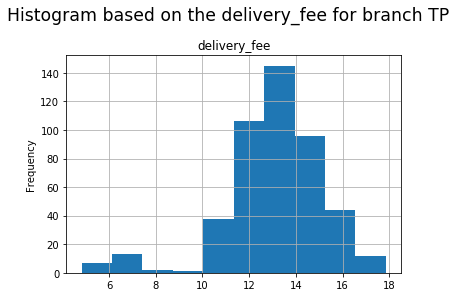

In [106]:
#drawing the histogram with the required parameters for branch TP
fig = plt.figure(figsize=(7,7), dpi=100)
TP_visualise.hist(column='delivery_fee')
plt.suptitle('Histogram based on the delivery_fee for branch TP', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.ylabel('Frequency')
plt.show()

### 12.2 Visualization for branch NS

In [107]:
#getting the rows which consists of branch_code NS
NS_visualise = total_no_rows[total_no_rows.branch_code == 'NS']

In [108]:
NS_visualise

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI00748,2018-12-23,19:49:51,Dinner,NS,"[('Salmon', 8), ('Fish&Chips', 5), ('Pasta', 9...",804.50,-37.821351,144.969579,0,8.752,16.886002
1,ORDI02381,2018-04-04,11:02:32,Breakfast,NS,"[('Eggs', 5), ('Pancake', 7)]",279.75,-37.813154,144.947786,0,9.991,14.985784
2,ORDI02298,2018-05-28,12:54:05,Lunch,NS,"[('Fries', 3), ('Steak', 2), ('Burger', 1), ('...",257.80,-37.793050,144.975720,0,8.186,13.479413
3,ORDI06037,2018-08-08,15:16:03,Lunch,NS,"[('Fries', 6), ('Salad', 8), ('Steak', 10)]",659.60,-37.819012,144.960315,0,8.878,14.072151
4,ORDI03453,2018-01-28,08:50:42,Breakfast,NS,"[('Coffee', 6), ('Pancake', 2), ('Eggs', 9), (...",396.50,-37.818369,144.956713,0,8.955,15.681150
5,ORDZ07273,2018-09-22,16:47:19,Dinner,NS,"[('Salmon', 7), ('Fish&Chips', 10)]",637.00,-37.824643,144.972064,0,9.220,17.152902
6,ORDC07421,2018-07-11,14:15:12,Lunch,NS,"[('Steak', 9), ('Burger', 9), ('Chicken', 5), ...",1024.40,-37.801000,144.972324,0,6.278,11.413201
7,ORDC05171,2018-12-15,19:29:34,Dinner,NS,"[('Pasta', 1), ('Salmon', 8)]",355.50,-37.819648,144.959907,0,8.966,16.898899
8,ORDI10810,2018-04-28,11:53:14,Breakfast,NS,"[('Cereal', 8), ('Pancake', 3), ('Eggs', 4)]",328.75,-37.806470,144.963006,0,7.306,14.379253
9,ORDZ10885,2018-12-31,20:00:00,Dinner,NS,"[('Pasta', 7), ('Salmon', 7)]",479.50,-37.807854,145.008600,0,10.300,16.267909


<Figure size 700x700 with 0 Axes>

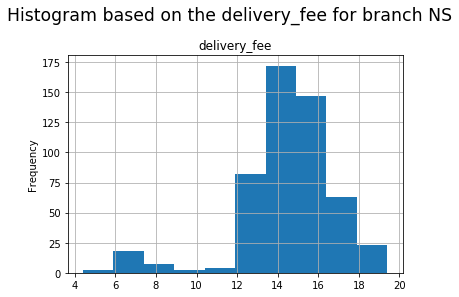

In [109]:
#drawing the histogram with the required parameters for branch NS
fig = plt.figure(figsize=(7,7), dpi=100)
NS_visualise.hist(column='delivery_fee')
plt.suptitle('Histogram based on the delivery_fee for branch NS', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.ylabel('Frequency')
plt.show()

### 12.3 Visualization for branch BK

In [110]:
#getting the rows which consists of branch_code NS
BK_visualise = total_no_rows[total_no_rows.branch_code == 'BK']

In [111]:
BK_visualise

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX03810,2018-11-08,18:18:35,Dinner,BK,"[('Salmon', 1), ('Fish&Chips', 5), ('Pasta', 7)]",408.50,-37.814611,144.990405,0,5.417,11.443110
1,ORDX08252,2018-06-22,13:34:38,Lunch,BK,"[('Fries', 10), ('Steak', 8)]",480.00,-37.810297,144.961185,0,7.636,13.338714
2,ORDX08215,2018-09-09,16:16:54,Dinner,BK,"[('Fish&Chips', 5), ('Salmon', 3), ('Pasta', 3)]",380.50,-37.823266,144.993752,0,5.823,14.678840
3,ORDX08075,2018-03-11,10:11:49,Breakfast,BK,"[('Pancake', 4), ('Coffee', 7)]",149.50,-37.801992,144.963817,0,7.807,15.096539
4,ORDK00849,2018-01-03,08:00:00,Breakfast,BK,"[('Cereal', 1), ('Coffee', 1), ('Eggs', 5), ('...",356.75,-37.804138,144.938421,1,10.091,7.347990
5,ORDX08439,2018-10-14,17:27:53,Dinner,BK,"[('Shrimp', 4), ('Salmon', 6), ('Fish&Chips', ...",622.00,-37.810627,144.986268,0,5.456,14.933522
6,ORDX02699,2018-10-20,17:38:01,Dinner,BK,"[('Salmon', 7), ('Pasta', 5)]",424.50,-37.808165,144.972981,0,6.545,15.775447
7,ORDK05255,2018-08-30,15:56:37,Lunch,BK,"[('Steak', 7), ('Chicken', 10), ('Burger', 1),...",700.40,-37.810566,144.943379,0,10.798,16.958983
8,ORDA10407,2018-10-05,17:07:36,Dinner,BK,"[('Pasta', 10), ('Fish&Chips', 4)]",415.00,-37.808030,144.957292,0,8.006,14.768112
9,ORDA05056,2018-03-08,10:11:49,Breakfast,BK,"[('Eggs', 8), ('Pancake', 7), ('Coffee', 7)]",398.25,-37.813261,144.977805,0,6.357,11.110680


<Figure size 700x700 with 0 Axes>

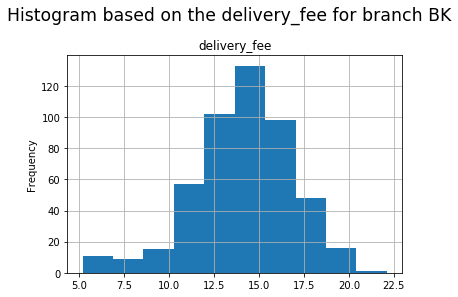

In [112]:
#drawing the histogram with the required parameters for branch BK
fig = plt.figure(figsize=(7,7), dpi=100)
BK_visualise.hist(column='delivery_fee')
plt.suptitle('Histogram based on the delivery_fee for branch BK', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.ylabel('Frequency')
plt.show()

### 12.4 Observation from delivery_fees for each branch

From the above distribution curves of histogram drawn based on the delivery_fee for each branch, we can observe that for branches TP and NS is more skewed to left when compared to branch BK. Also we can observe that there is a possibility of branch BK having more customers with loyalty than the other 2 branches.

## 13. Summary

This assessment measured the understanding of dealing with dirty data, outliers data and missing data:

- **Using numpy.linalg to predict prices for menu**

By using numpy.linalg we predict the prices for menu for each item. The numpy.linalg package takes the input values in the form of equations, solve those and gives the desired output.

- **Using sklearn.linear_model**

Using sklearn.linear_model to generate the linear regression model for missing_data, outlier_data and dirty_data. Using linear regression model we will fit the training data / test data and predict the values for the data we require.

- **Using boxplots to determine the outliers**:

Using matplotlib, outliers are generated in the outlier data and they are removed based on the calculated lower bound and upper bound's using quantiles and IQR.

## 14. References

- *How to use numpy.linalg?* [Response to]. Retrieved from http://www.ster.kuleuven.be/~pieterd/python/html/core/linalg.html

- Geckstar(Oct 22, 2016). *Using networkx to draw the graph between given nodes?* [Response to]. Retrieved from https://stackoverflow.com/questions/40088042/networkx-get-the-distance-between-nodes/40190152

- *scikit learn* Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Ernes(Oct 24, 2017). *How to draw boxplots for dataframes using matplotlib* [Response to]. Retrieved from https://stackoverflow.com/questions/46916701/python-how-to-draw-some-boxplots-for-data-frames-using-matplotlib